# [PCS3635] Análise de Dados

In [406]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import lognorm
import statsmodels.api as sm
from plotnine import (
    ggplot,
    aes,
    after_stat,
    geom_histogram,
    geom_qq,
    geom_vline,
    geom_qq_line,
    geom_density,
    facet_wrap,
    facet_grid,
    coord_flip,
    scale_y_continuous,
    scale_y_sqrt,
    scale_y_log10,
    scale_x_log10,
    scale_fill_manual,
    theme_bw,
    theme_xkcd,
)

## Estatística

In [407]:
critic_p_value = 0.05

In [408]:
linkert_categories = [1, 2, 3, 4, 5]

In [409]:
def get_percentage_str(fraction: float) -> str:
    """Converts an fraction in to a percentage

    Args:
        fraction (float): _description_

    Returns:
        str: _description_
    
    Examples:
        >>> get_percentage_str(0.01537)
        54.23 %
        
        >>> get_percentage_str(0.5672434)
        56.72 %
    """
    percentage_str = 100*fraction
    percentage_str = f'{percentage_str:.2f}%'
    
    return percentage_str

In [410]:
def count_linkert(data: np.array) -> np.array:
    """Counts the number of ocurrencies of every category of the linkert scale

    Args:
        data (np.array): the input data

    Returns:
        np.array: the counting vector, with the number of occurrences 
    
    Examples:
        >>> input_data = np.array([4, 1, 2, 2, 1, 4, 4, 1, 4])
        >>> count_linkert(input_data)
        array([3., 2., 0., 4., 0.])
    """
    linkert_counting = np.zeros(5)
    
    for i, category in enumerate(linkert_categories):
        linkert_counting[i] += data[data == category].size
    
    return linkert_counting

## Leitura do CSV

In [411]:
df = pd.read_csv('encoded_data.csv')

## Descrição Básica do Dataframe 

In [412]:
df.head()

,date,PA_1,PA_2,PA_3,PA_4,PA_5,PA_6,PA_7,PA_8,PA_8_1,...,PS_4_2,PS_4_3,PS_4_4,PS_4_5,PS_5,PS_6,PS_7_1,PS_7_2,PS_7_3,PS_8
0,22/04/2024 15:22:50,1,4,8.0,12.0,4,3,5,"Se atrasar com o conteúdo outras disciplinas, ...",1,...,2.0,2.0,1.0,1.0,-5.0,1.0,2.0,1.0,0.0,NaN
1,22/04/2024 15:23:42,1,1,12.0,40.0,4,1,5,"Se atrasar com o conteúdo outras disciplinas, ...",1,...,3.0,2.0,2.0,2.0,5.0,1.0,0.0,2.0,1.0,O fato de LabDig exigir mais tempo que o norma...
2,22/04/2024 15:24:48,2,4,8.0,9.0,2,1,2,Falta de tempo para o EP de [PCS3616] Sistemas...,0,...,3.0,3.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,NaN
3,22/04/2024 15:29:14,2,4,6.0,30.0,4,3,4,"Se atrasar com o conteúdo outras disciplinas, ...",1,...,4.0,4.0,4.0,4.0,5.0,1.0,0.0,0.0,0.0,"A matéria em si foi exigente, foi puxada, p..."
4,22/04/2024 15:43:26,1,5,1.0,10.0,1,1,1,NaN,0,...,5.0,5.0,5.0,5.0,15.0,0.0,0.0,0.0,0.0,NaN


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 53 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     31 non-null     object 
 1   PA_1     31 non-null     int64  
 2   PA_2     31 non-null     int64  
 3   PA_3     29 non-null     float64
 4   PA_4     28 non-null     float64
 5   PA_5     31 non-null     int64  
 6   PA_6     31 non-null     int64  
 7   PA_7     31 non-null     int64  
 8   PA_8     29 non-null     object 
 9   PA_8_1   31 non-null     int64  
 10  PA_8_2   31 non-null     int64  
 11  PA_8_3   31 non-null     int64  
 12  PA_8_4   31 non-null     int64  
 13  PA_8_5   31 non-null     int64  
 14  PA_8_6   31 non-null     int64  
 15  PA_8_7   31 non-null     int64  
 16  PA_8_8   31 non-null     int64  
 17  PA_8_9   31 non-null     int64  
 18  PA_9     28 non-null     float64
 19  PA_10    31 non-null     int64  
 20  PA_11_1  29 non-null     float64
 21  PA_11_2  29 non-nu

In [414]:
df.shape

(31, 53)

## Configuração das Figuras

In [415]:
# if this variable is True, when the notebook is fully executed, all the figures will be replaced
# by the new figures of this notebook
save_all_figures = True

In [416]:
fig_default_size = (8, 6)
fig_default_color = 'darkblue'
top_bar_text_offset = 0.5
right_bar_text_offset = 2.0

fig_2_subplots_default_size = (6, 4)

In [417]:
plt.rcParams.update({'font.size': 14})

## Pesquisa Acadêmica

### PA_1
De qual turma você faz parte?<br>
- (a) Segunda-Feira<br>
- (b) Quarta-Feira

In [418]:
PA_1 = df['PA_1']

# separation by groups
monday_df = df[df['PA_1'] == 1]
wednesday_df = df[df['PA_1'] == 2]

PA_1.shape, monday_df.shape, wednesday_df.shape

((31,), (11, 53), (20, 53))

In [419]:
# total number of students per group
monday_total_n = 38
wednesday_total_n = 27
total_n = monday_total_n + wednesday_total_n

# total number of students that answered the research per group
monday_total_n_answered = monday_df.shape[0]
wednesday_total_n_answered = wednesday_df.shape[0]
total_n_answered = monday_total_n_answered + wednesday_total_n_answered

# n answers / n students per group
monday_fraction_answered = monday_total_n_answered/monday_total_n
wednesday_fraction_answered = wednesday_total_n_answered/wednesday_total_n

# n answers / n students per group in percentage
monday_fraction_answered_percentage = 100*monday_fraction_answered
wednesday_fraction_answered_percentage = 100*wednesday_fraction_answered
total_fraction_answered_percentage = 100*total_n_answered/total_n

groups = {
    'total_n': total_n,
    'monday_total_n': monday_total_n,
    'wednesday_total_n': wednesday_total_n,
    'monday_total_n_answered': monday_total_n_answered,
    'wednesday_total_n_answered': wednesday_total_n_answered,
    'total_n_answered': total_n_answered,
    'monday_fraction_answered': monday_fraction_answered,
    'wednesday_fraction_answered': wednesday_fraction_answered,
    'monday_fraction_answered_percentage': monday_fraction_answered_percentage,
    'wednesday_fraction_answered_percentage': wednesday_fraction_answered_percentage,
    'total_fraction_answered_percentage': total_fraction_answered_percentage
}

groups

{'total_n': 65,
 'monday_total_n': 38,
 'wednesday_total_n': 27,
 'monday_total_n_answered': 11,
 'wednesday_total_n_answered': 20,
 'total_n_answered': 31,
 'monday_fraction_answered': 0.2894736842105263,
 'wednesday_fraction_answered': 0.7407407407407407,
 'monday_fraction_answered_percentage': 28.947368421052634,
 'wednesday_fraction_answered_percentage': 74.07407407407408,
 'total_fraction_answered_percentage': 47.69230769230769}

In [420]:
# resume
PA_1_resume = [
    {
        'total_in_class': total_n,
        'n_answered': total_n_answered,
        'n_answered_proportion': total_fraction_answered_percentage},
    {
        'total_in_class': monday_total_n,
        'n_answered': monday_total_n_answered,
        'n_answered_proportion': monday_fraction_answered_percentage},
    {
        'total_in_class': wednesday_total_n,
        'n_answered': wednesday_total_n_answered,
        'n_answered_proportion': wednesday_fraction_answered_percentage}
]


PA_1_indexes = ['general', 'monday', 'wednesday']

PA_1_resume_table = pd.DataFrame(PA_1_resume, index=PA_1_indexes)

PA_1_resume_table

,total_in_class,n_answered,n_answered_proportion
general,65,31,47.692308
monday,38,11,28.947368
wednesday,27,20,74.074074


Contingency test

In [421]:
PA_1_np_contingency_table = np.array([
    [groups['monday_total_n_answered'], groups['monday_total_n'] - groups['monday_total_n_answered']],
    [groups['wednesday_total_n_answered'], groups['wednesday_total_n'] - groups['wednesday_total_n_answered']]])

PA_1_np_contingency_table

array([[11, 27],
       [20,  7]])

In [422]:
chi2, p, dof, expected = chi2_contingency(PA_1_np_contingency_table)

significant_difference = p < critic_p_value


print(f'chi-squared: {chi2}')
print(f'p-value: {p}')
print(f'degrees of freedom: {dof}\n')
print(f'expected frequencies:\n{expected}')
print(f'obtained frequencies:\n{PA_1_np_contingency_table}\n')
print(f'significant difference: {significant_difference}')

chi-squared: 11.139653866640034
p-value: 0.0008450165780109888
degrees of freedom: 1

expected frequencies:
[[18.12307692 19.87692308]
 [12.87692308 14.12307692]]
obtained frequencies:
[[11 27]
 [20  7]]

significant difference: True


### PA_2
A disciplina possuiu dois créditos de trabalho (3h20/semana). O tempo gasto por você com a disciplina, em período fora de sala de aula, ficou dentro desse limite?
- (a) Foi muito abaixo desse limite
- (b) Foi abaixo do limite
- (c) Foi adequado
- (d) Foi acima desse limite
- (e) Foi muito acima do limite

In [423]:
PA_2 = df['PA_2']
PA_2_monday = monday_df['PA_2']
PA_2_wednesday = wednesday_df['PA_2']

PA_2.shape, PA_2_monday.shape, PA_2_wednesday.shape

((31,), (11,), (20,))

In [424]:
PA_2_classes = [1, 2, 3, 4, 5]

# index mapping
PA_2_categories_mapping = {
    1: 'muito abaixo',
    2: 'abaixo',
    3: 'adequado', 
    4: 'acima',
    5: 'muito acima'
}

# categories
PA_2_categories = [PA_2_categories_mapping[PA_2_class] for PA_2_class in PA_2_classes]

# counting categories
PA_2_counting = PA_2.value_counts()
PA_2_monday_counting = PA_2_monday.value_counts()
PA_2_wednesday_counting = PA_2_wednesday.value_counts()

# n = quantity of answers per dataframe
PA_2_n_answers = PA_2.shape[0]
PA_2_monday_n_answers = PA_2_monday.shape[0]
PA_2_wednesday_n_answers = PA_2_wednesday.shape[0]

# filling with 0 non observed categories
PA_2_counting = PA_2_counting.reindex(PA_2_classes, fill_value=0)
PA_2_monday_counting = PA_2_monday_counting.reindex(PA_2_classes, fill_value=0)
PA_2_wednesday_counting = PA_2_wednesday_counting.reindex(PA_2_classes, fill_value=0)

# casting in numpy arrays
PA_2_counting = np.array(PA_2_counting)
PA_2_monday_counting = np.array(PA_2_monday_counting)
PA_2_wednesday_counting = np.array(PA_2_wednesday_counting)

# resume
print(f'PA_2_counting\nn_answers: {PA_2_n_answers}\narray: {PA_2_counting}\n')
print(f'PA_2_monday_counting\nn_answers: {PA_2_monday_n_answers}\narray: {PA_2_monday_counting}\n')
print(f'PA_2_wednesday_counting\nn_answers: {PA_2_wednesday_n_answers}\narray: {PA_2_wednesday_counting}\n')

PA_2_counting
n_answers: 31
array: [ 1  0  0 13 17]

PA_2_monday_counting
n_answers: 11
array: [1 0 0 5 5]

PA_2_wednesday_counting
n_answers: 20
array: [ 0  0  0  8 12]



In [425]:
# frequencies calculation
PA_2_frequency = PA_2_counting/sum(PA_2_counting)
PA_2_monday_frequency = PA_2_monday_counting/sum(PA_2_monday_counting)
PA_2_wednesday_frequency = PA_2_wednesday_counting/sum(PA_2_wednesday_counting)

print(f'general: {PA_2_frequency}\nmonday: {PA_2_monday_frequency}\nwednesday: {PA_2_wednesday_frequency}')

general: [0.03225806 0.         0.         0.41935484 0.5483871 ]
monday: [0.09090909 0.         0.         0.45454545 0.45454545]
wednesday: [0.  0.  0.  0.4 0.6]


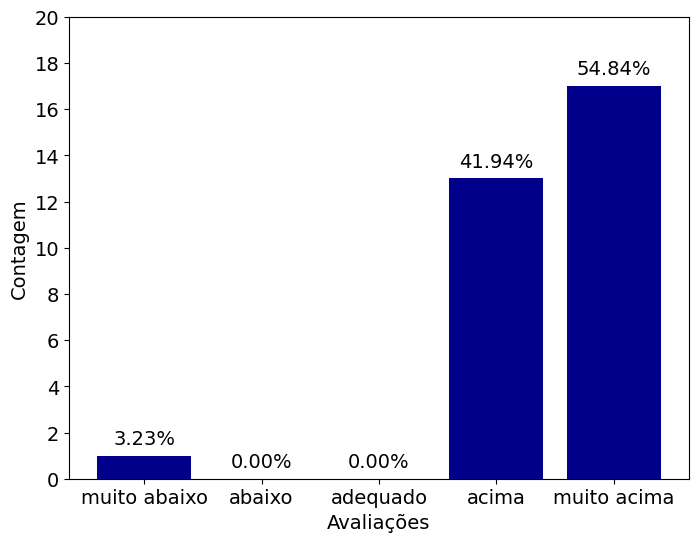

In [426]:
# plotting PA_2 for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 20)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_general_classes')
    
# showing the figure
plt.show()

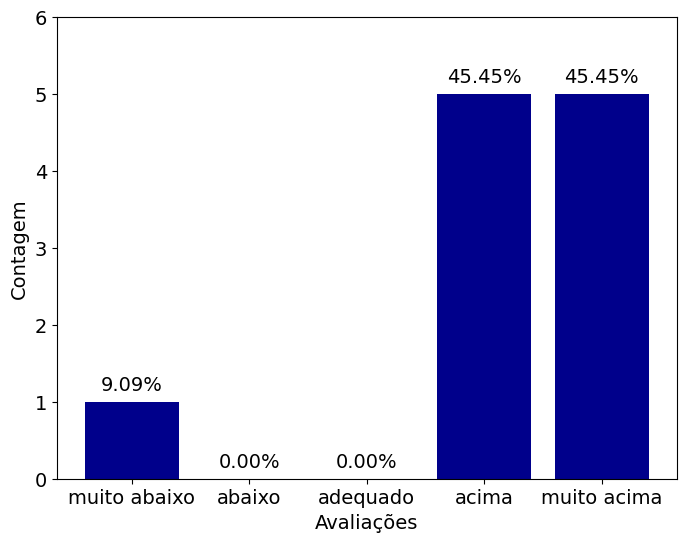

In [427]:
# plotting PA_2 for general counting in monday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_monday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 6)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_monday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_monday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_monday_classes')
    
# showing the figure
plt.show()

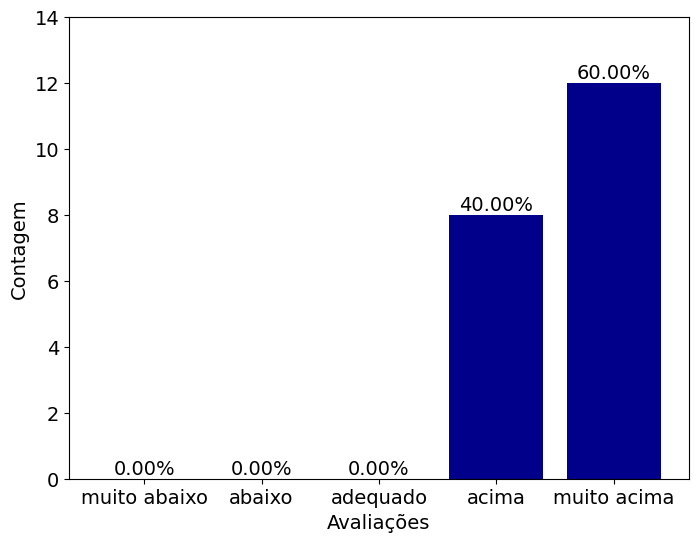

In [428]:
# plotting PA_2 for general counting in wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

axs.bar(PA_2_categories, PA_2_wednesday_counting, color=fig_default_color)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 14)
axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_2_wednesday_counting[i] + 0.3*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_2_wednesday_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_2_wednesday_classes')
    
# showing the figure
plt.show()

Binarização dos dados

In [429]:
# binarization of the data

# general
PA_2_bin_counting_under = sum(PA_2_counting[0:2])
PA_2_bin_counting_over = sum(PA_2_counting[3:5])
PA_2_bin_counting = np.array([PA_2_bin_counting_under, PA_2_bin_counting_over])

# monday
PA_2_monday_bin_counting_under = sum(PA_2_monday_counting[0:2])
PA_2_monday_bin_counting_over = sum(PA_2_monday_counting[3:5])
PA_2_monday_bin_counting = np.array([PA_2_monday_bin_counting_under, PA_2_monday_bin_counting_over])

# wednesday
PA_2_wednesday_bin_counting_under = sum(PA_2_wednesday_counting[0:2])
PA_2_wednesday_bin_counting_over = sum(PA_2_wednesday_counting[3:5])
PA_2_wednesday_bin_counting = np.array([PA_2_wednesday_bin_counting_under, PA_2_wednesday_bin_counting_over])

PA_2_bin_counting, PA_2_monday_bin_counting, PA_2_wednesday_bin_counting

(array([ 1, 30]), array([ 1, 10]), array([ 0, 20]))

In [430]:
# frequency counting for the binary data
PA_2_bin_frequency = PA_2_bin_counting/sum(PA_2_bin_counting)
PA_2_monday_bin_frequency = PA_2_monday_bin_counting/sum(PA_2_monday_bin_counting)
PA_2_wednesday_bin_frequency = PA_2_wednesday_bin_counting/sum(PA_2_wednesday_bin_counting)

PA_2_bin_frequency, PA_2_monday_bin_frequency, PA_2_wednesday_bin_frequency

(array([0.03225806, 0.96774194]),
 array([0.09090909, 0.90909091]),
 array([0., 1.]))

In [431]:
# resume

# PA_2_resume = {
#     'geral (contagem)': PA_2_bin_counting,
#     'segunda (contagem)': PA_2_monday_bin_counting,
#     'quarta (contagem)': PA_2_wednesday_bin_counting,
#     'geral (frequência)': PA_2_bin_frequency, 
#     'segunda (frequência)': PA_2_monday_bin_frequency, 
#     'quarta (frequência)': PA_2_wednesday_bin_frequency
# }

PA_2_resume = [
    {'sim (contagem)': PA_2_bin_counting[1], 'não (contagem)': PA_2_bin_counting[0], 
     'sim (frequência)': PA_2_bin_frequency[1], 'não (frequência)': PA_2_bin_frequency[0]},
    
    {'sim (contagem)': PA_2_monday_bin_counting[1], 'não (contagem)': PA_2_monday_bin_counting[0], 
     'sim (frequência)': PA_2_monday_bin_frequency[1], 'não (frequência)': PA_2_monday_bin_frequency[0]},
    
    {'sim (contagem)': PA_2_wednesday_bin_counting[1], 'não (contagem)': PA_2_wednesday_bin_counting[0], 
     'sim (frequência)': PA_2_wednesday_bin_frequency[1], 'não (frequência)': PA_2_wednesday_bin_frequency[0]}
]

PA_2_indexes = ['geral', 'segunda', 'quarta']

PA_2_resume_table = pd.DataFrame(PA_2_resume, index=PA_2_indexes)

PA_2_resume_table

,sim (contagem),não (contagem),sim (frequência),não (frequência)
geral,30,1,0.967742,0.032258
segunda,10,1,0.909091,0.090909
quarta,20,0,1.000000,0.000000


In [432]:
# confidence intervals
PA_2_ci_low, PA_2_ci_high = sm.stats.proportion_confint(
    PA_2_bin_counting[1],
    PA_2_bin_counting[1] + PA_2_bin_counting[0],
    alpha=0.05,
    method='wilson'
    )

PA_2_monday_ci_low, PA_2_monday_ci_high = sm.stats.proportion_confint(
    PA_2_monday_bin_counting[1],
    PA_2_monday_bin_counting[1] + PA_2_monday_bin_counting[0],
    alpha=0.05,
    method='wilson'
    )

PA_2_wednesday_ci_low, PA_2_wednesday_ci_high = sm.stats.proportion_confint(
    PA_2_wednesday_bin_counting[1],
    PA_2_wednesday_bin_counting[1] + PA_2_wednesday_bin_counting[0],
    alpha=0.05,
    method='wilson'
    )

print(f'PA_2 confidence intervals for bin data:')
print(f'general:   ({PA_2_ci_low}, {PA_2_ci_high})')
print(f'monday:    ({PA_2_monday_ci_low}, {PA_2_monday_ci_high})')
print(f'wednesday: ({PA_2_wednesday_ci_low}, {PA_2_wednesday_ci_high})')

PA_2 confidence intervals for bin data:
general:   (0.838058948352751, 0.9942827784745831)
monday:    (0.6226415635484044, 0.9837678271141153)
wednesday: (0.8388748419471804, 0.9999999999999999)


### PA_3
Durante as semanas de projeto, você participou do openlab com que frequência? Favor, indicar quantas vezes você foi e por quanto tempo costumava ficar nele.

In [433]:
PA_3 = df['PA_3']
PA_3_monday = monday_df['PA_3']
PA_3_wednesday = wednesday_df['PA_3']

PA_3 = PA_3.dropna()
PA_3_monday = PA_3_monday.dropna()
PA_3_wednesday = PA_3_wednesday.dropna()

PA_3.shape, PA_3_monday.shape, PA_3_wednesday.shape

((29,), (11,), (18,))

In [434]:
PA_3_n_sturges_rule = int(np.round(1 + np.log2(PA_3.size)))


print(f'n histogram classes = {PA_3_n_sturges_rule}')

n histogram classes = 6


In [435]:
PA_3_bins = np.arange(0, 2*(PA_3_n_sturges_rule + 1), 2)
PA_3_bins

array([ 0,  2,  4,  6,  8, 10, 12])

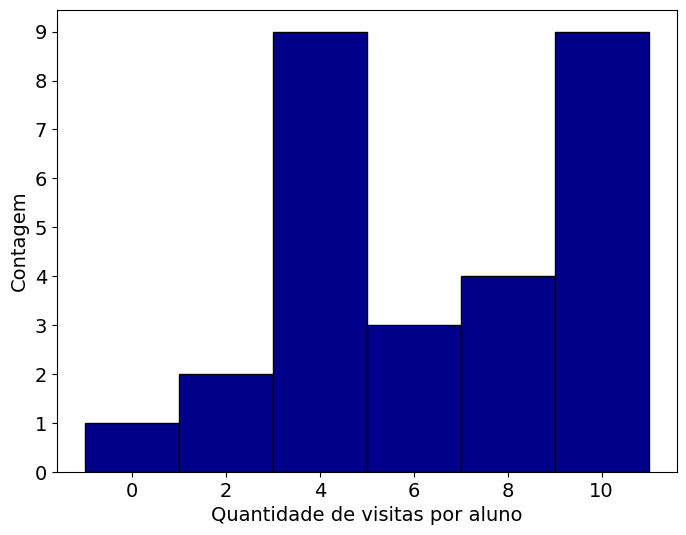

In [436]:
# plotting PA_3 histogram for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3, bins=PA_3_bins, color=fig_default_color, align='left', edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_histogram')
    
# showing the figure
plt.show()

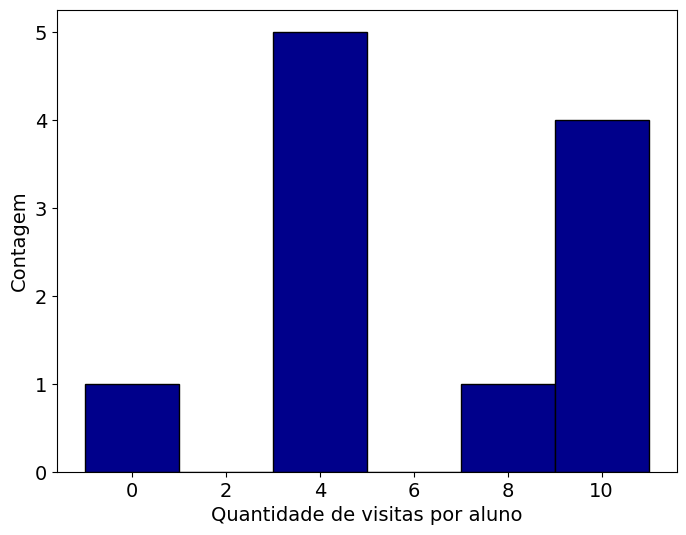

In [437]:
# plotting PA_3 histogram for monday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3_monday, bins=PA_3_bins, color=fig_default_color, align='left', edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_monday_histogram')
    
# showing the figure
plt.show()

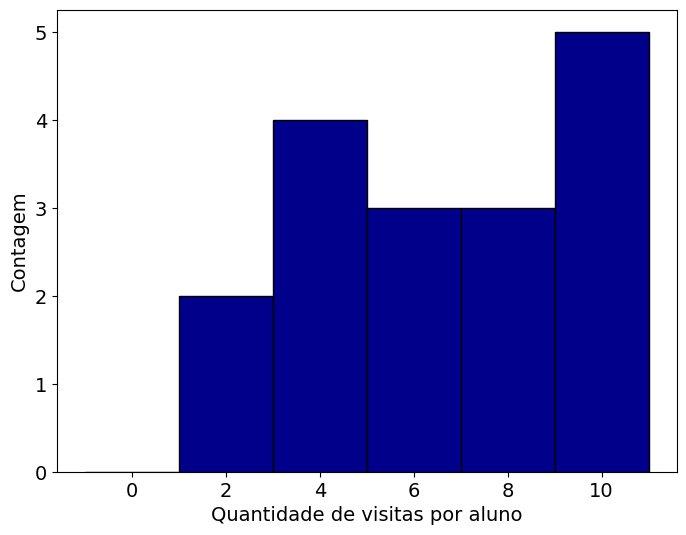

In [438]:

# plotting PA_3 histogram for wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_3_wednesday, bins=PA_3_bins, color=fig_default_color, align='left', edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_xlabel('Quantidade de visitas por aluno')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_wednesday_histogram')
    
# showing the figure
plt.show()

In [439]:
PA_3_data = [PA_3, PA_3_monday, PA_3_wednesday]

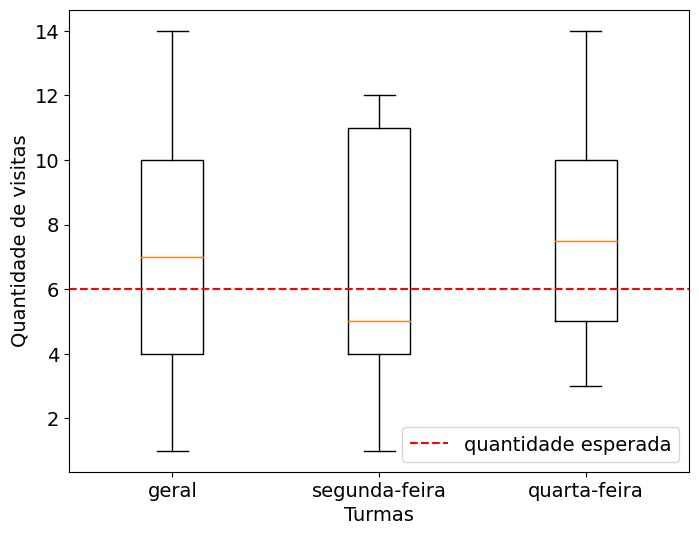

In [440]:
# plotting PA_3 box plot for the general, monday and wednesday groups 
fig, axs = plt.subplots(figsize=fig_default_size)

# considering 4 weeks of hands-on project development, with 50% (4 + 2 = 6) margin
PA_3_expected_visits = 6

# plotting the box plot
plt.boxplot(PA_3_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])
plt.axhline(y=PA_3_expected_visits, color='red', linestyle='dashed', label='quantidade esperada')

# axs setting
axs.set_xlabel('Turmas')
axs.set_ylabel('Quantidade de visitas')
axs.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_boxplot')
    
# showing the figure
plt.show()

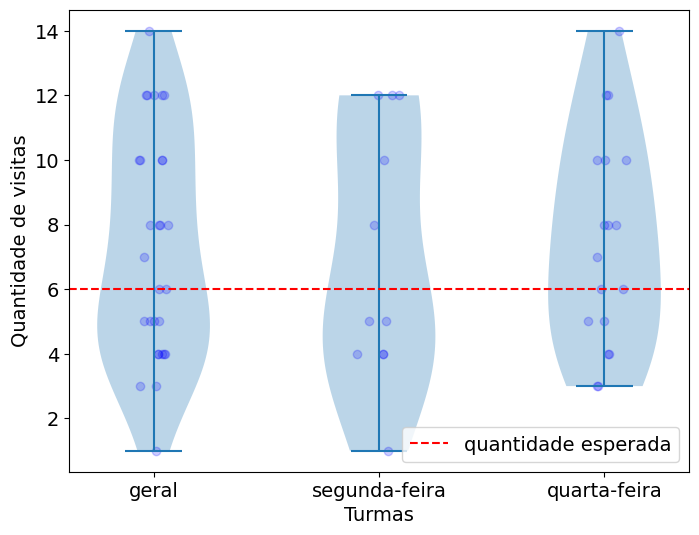

In [441]:
# plotting PA_3 violin plot for the general, monday and wednesday groups 
fig, axs = plt.subplots(figsize=fig_default_size)

# plotting the violinplot
axs.violinplot(PA_3_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])
plt.axhline(y=PA_3_expected_visits, color='red', linestyle='dashed', label='quantidade esperada')

# axs setting
axs.set_xlabel('Turmas')
axs.set_ylabel('Quantidade de visitas')
axs.legend()

# jitter points
for i, data_point in enumerate(PA_3_data):
    y = data_point
    x = np.random.normal(loc=i + 1, scale=0.05, size=len(data_point))
    plt.scatter(x, y, alpha=0.2, color='blue', label='pontos')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_3_violinplot')
    
# showing the figure
plt.show()

In [442]:
# PA_3 resume
# PA_3_expected_visits

PA_3_exceded = PA_3[PA_3 > PA_3_expected_visits]
PA_3_monday_exceded = PA_3_monday[PA_3_monday > PA_3_expected_visits]
PA_3_wednesday_exceded = PA_3_wednesday[PA_3_wednesday > PA_3_expected_visits]

PA_3_exceded_fraction = PA_3_exceded.size/PA_3.size
PA_3_monday_exceded_fraction = PA_3_monday_exceded.size/PA_3_monday.size
PA_3_wednesday_exceded_fraction = PA_3_wednesday_exceded.size/PA_3_wednesday.size

PA_3_general_resume = [np.min(PA_3), np.max(PA_3), np.mean(PA_3), np.median(PA_3), 
                       np.percentile(PA_3, 25), np.percentile(PA_3, 75), 
                       PA_3_exceded.size, 100*PA_3_exceded_fraction]

PA_3_monday_resume = [np.min(PA_3_monday), np.max(PA_3_monday), np.mean(PA_3_monday), np.median(PA_3_monday), 
                       np.percentile(PA_3_monday, 25), np.percentile(PA_3_monday, 75), 
                       PA_3_monday_exceded.size, 100*PA_3_monday_exceded_fraction]

PA_3_wednesday_resume = [np.min(PA_3_wednesday), np.max(PA_3_wednesday), np.mean(PA_3_wednesday), np.median(PA_3_wednesday), 
                       np.percentile(PA_3_wednesday, 25), np.percentile(PA_3_wednesday, 75), 
                       PA_3_wednesday_exceded.size, 100*PA_3_wednesday_exceded_fraction]

PA_3_resume_indexes = ['geral', 'segunda', 'quarta']
PA_3_resume_columns = ['mínimo', 'máximo', 'média', 'mediana', '1º quartil', '3º quartil', 'excedidos', 'excedidos (%)']

PA_3_resume_table = pd.DataFrame([PA_3_general_resume, PA_3_monday_resume, PA_3_wednesday_resume], columns=PA_3_resume_columns, index=PA_3_resume_indexes)

PA_3_resume_table

,mínimo,máximo,média,mediana,1º quartil,3º quartil,excedidos,excedidos (%)
geral,1.0,14.0,7.310345,7.0,4.0,10.0,15,51.724138
segunda,1.0,12.0,7.000000,5.0,4.0,11.0,5,45.454545
quarta,3.0,14.0,7.500000,7.5,5.0,10.0,10,55.555556


In [443]:
# confidence intervals
PA_3_ci_low, PA_3_ci_high = sm.stats.proportion_confint(
    PA_3_exceded.size,
    PA_3.size,
    alpha=0.05,
    method='normal'
    )

PA_3_monday_ci_low, PA_3_monday_ci_high = sm.stats.proportion_confint(
    PA_3_monday_exceded.size,
    PA_3_monday.size,
    alpha=0.05,
    method='normal'
    )

PA_3_wednesday_ci_low, PA_3_wednesday_ci_high = sm.stats.proportion_confint(
    PA_3_wednesday_exceded.size,
    PA_3_wednesday.size,
    alpha=0.05,
    method='normal'
    )

print(f'PA_3 confidence intervals for bin data:')
print(f'general:   ({PA_3_ci_low}, {PA_3_ci_high})')
print(f'monday:    ({PA_3_monday_ci_low}, {PA_3_monday_ci_high})')
print(f'wednesday: ({PA_3_wednesday_ci_low}, {PA_3_wednesday_ci_high})')



PA_3 confidence intervals for bin data:
general:   (0.33537151551979943, 0.6991112431008903)
monday:    (0.16029327346391603, 0.748797635626993)
wednesday: (0.32600183988719944, 0.7851092712239117)


### PA_4
Quantas horas aproximadamente, você investiu no projeto, somente de tempo fora de sala de aula por semana? (openlab + tempo na poli ou em casa, desenvolvendo o projeto)

In [444]:
PA_4 = df['PA_4']
PA_4_monday = monday_df['PA_4']
PA_4_wednesday = wednesday_df['PA_4']

PA_4 = PA_4.dropna()
PA_4_monday = PA_4_monday.dropna()
PA_4_wednesday = PA_4_wednesday.dropna()

PA_4.shape, PA_4_monday.shape, PA_4_wednesday.shape

((28,), (11,), (17,))

In [445]:
# considering 3h20 per week in 6 weeks
PA_4_expected_hours = 20
PA_4_expected_hours_safety_margin = 10

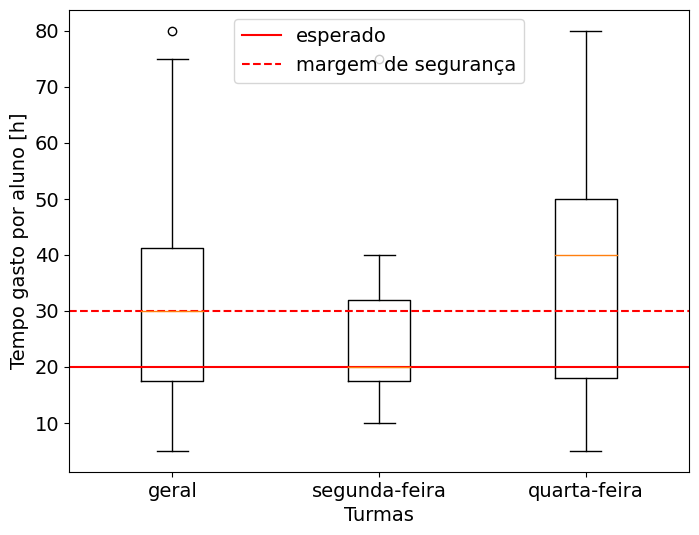

In [446]:
# plotting PA_4 box plot for the general, monday and wednesday groups 
fig, axs = plt.subplots(figsize=fig_default_size)

PA_4_data = [PA_4, PA_4_monday, PA_4_wednesday]

# plotting the box plot
plt.boxplot(PA_4_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])
plt.axhline(y=PA_4_expected_hours, color='red', linestyle='solid', label='esperado')
plt.axhline(y=PA_4_expected_hours + PA_4_expected_hours_safety_margin, color='red', linestyle='dashed', label='margem de segurança')

# axs setting
axs.set_xlabel('Turmas')
axs.set_ylabel('Tempo gasto por aluno [h]')
axs.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_boxplot')
    
# showing the figure
plt.show()

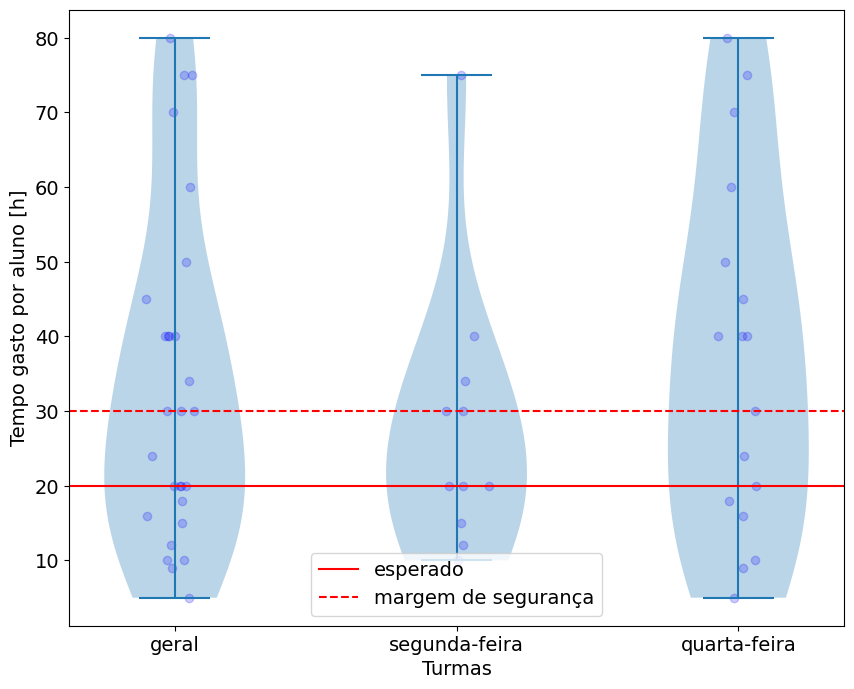

In [447]:
# plotting PA_4 violin plot for the general, monday and wednesday groups 
fig, axs = plt.subplots(figsize=(10,8))

# plotting the violinplot
axs.violinplot(PA_4_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])
plt.axhline(y=PA_4_expected_hours, color='red', linestyle='solid', label='esperado')
plt.axhline(y=PA_4_expected_hours + PA_4_expected_hours_safety_margin, color='red', linestyle='dashed', label='margem de segurança')

# axs setting
axs.set_xlabel('Turmas')
axs.set_ylabel('Tempo gasto por aluno [h]')
axs.legend()

# jitter points
for i, data_point in enumerate(PA_4_data):
    y = data_point
    x = np.random.normal(loc=i + 1, scale=0.05, size=len(data_point))
    plt.scatter(x, y, alpha=0.2, color='blue', label='pontos')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_violinplot')
    
# showing the figure
plt.show()

In [448]:
PA_4_n_sturges_rule = int(np.round(1 + np.log2(PA_4.size)))

print(f'n histogram classes = {PA_4_n_sturges_rule}')

n histogram classes = 6


In [449]:
PA_4_bins = np.arange(0, 20*(PA_4_n_sturges_rule + 1), 20)
PA_4_bins

array([  0,  20,  40,  60,  80, 100, 120])

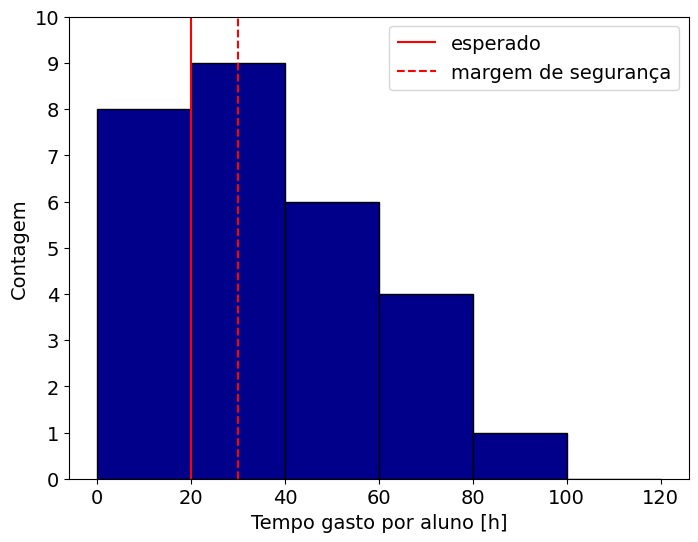

In [450]:
# plotting PA_4 histogram for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_4, bins=PA_4_bins, color=fig_default_color, edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_ylim(0, 10)

# vertical lines of the expected
axs.vlines(PA_4_expected_hours, 0, 10, linestyles='solid', color='r', label='esperado')
axs.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, 10, linestyles='dashed', color='r', label='margem de segurança')

axs.set_xlabel('Tempo gasto por aluno [h]')
axs.set_ylabel('Contagem')
axs.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_histogram')
    
# showing the figure
plt.show()

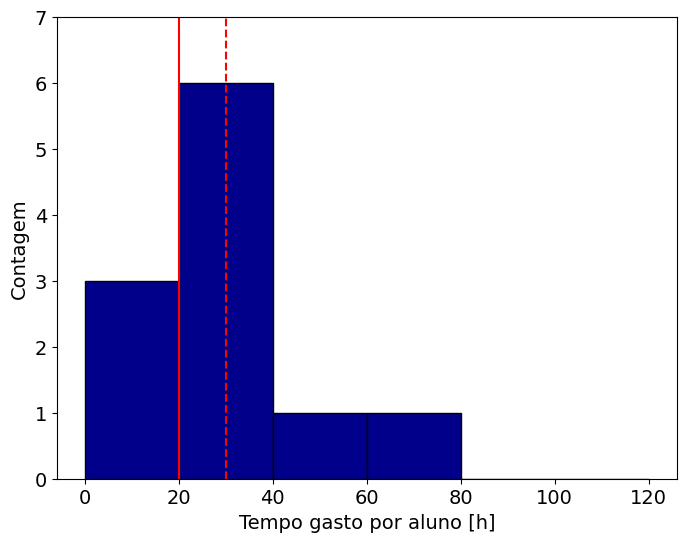

In [451]:
# plotting PA_4 histogram for monday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_4_monday, bins=PA_4_bins, color=fig_default_color, edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_ylim(0, 7)

# vertical lines of the expected
axs.vlines(PA_4_expected_hours, 0, 7, linestyles='solid', color='r', label='esperado')
axs.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, 7, linestyles='dashed', color='r', label='esperado')

axs.set_xlabel('Tempo gasto por aluno [h]')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_monday_histogram')
    
# showing the figure
plt.show()

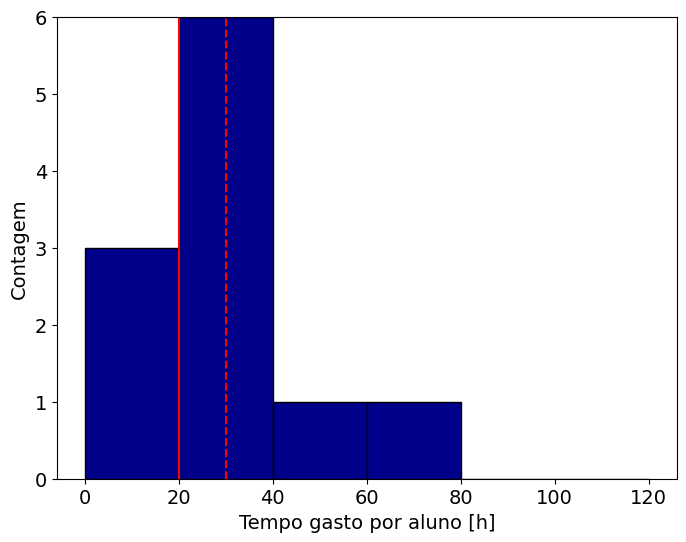

In [452]:
# plotting PA_4 histogram for wednesday
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_4_monday, bins=PA_4_bins, color=fig_default_color, edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_ylim(0, 6)

# vertical lines of the expected
axs.vlines(PA_4_expected_hours, 0, 6, linestyles='solid', color='r', label='esperado')
axs.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, 6, linestyles='dashed', color='r', label='esperado')

axs.set_xlabel('Tempo gasto por aluno [h]')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_wednesday_histogram')
    
# showing the figure
plt.show()

In [453]:
def statistical_resume(amostra):
    """Evaluates the statistical resume of the data.

    Parâmetros:
        amostra (array-like): Uma amostra de valores numéricos.

    Retorna:
        dict: Um dicionário contendo o resumo estatístico com média, mediana, desvio padrão,
              quartis (1º e 3º), valor mínimo e valor máximo.
    """
    resumo = {
        'média': np.mean(amostra),
        'mediana': np.median(amostra),
        'desvio padrão': np.std(amostra),
        '1º quartil': np.percentile(amostra, 25),
        '3º quartil': np.percentile(amostra, 75),
        'mínimo': np.min(amostra),
        'máximo': np.max(amostra)
    }
    return resumo

In [454]:
PA_4_resume_data = [statistical_resume(PA_4), statistical_resume(PA_4_monday), statistical_resume(PA_4_wednesday)]

PA_4_resume_indexes = ['geral', 'segunda', 'quarta']

pd.DataFrame(PA_4_data, index=PA_4_resume_indexes)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
geral,12.0,40.0,9.0,30.0,10.0,80.0,60.0,45.0,75.0,70.0,...,16.0,20.0,5.0,15.0,75.0,40.0,30.0,24.0,18.0,50.0
segunda,12.0,40.0,NaN,NaN,10.0,NaN,NaN,NaN,75.0,NaN,...,NaN,20.0,NaN,15.0,NaN,NaN,30.0,NaN,NaN,NaN
quarta,NaN,NaN,9.0,30.0,NaN,80.0,60.0,45.0,NaN,70.0,...,16.0,NaN,5.0,NaN,75.0,40.0,NaN,24.0,18.0,50.0


In [455]:
PA_4_soft_exceeded = PA_4[PA_4 > PA_4_expected_hours].size
PA_4_hard_exceeded = PA_4[PA_4 > PA_4_expected_hours + PA_4_expected_hours_safety_margin].size

PA_4_monday_soft_exceeded = PA_4_monday[PA_4_monday > PA_4_expected_hours].size
PA_4_monday_hard_exceeded = PA_4_monday[PA_4_monday > PA_4_expected_hours + PA_4_expected_hours_safety_margin].size

PA_4_wednesday_soft_exceeded = PA_4_wednesday[PA_4_wednesday > PA_4_expected_hours].size
PA_4_wednesday_hard_exceeded = PA_4_wednesday[PA_4_wednesday > PA_4_expected_hours + PA_4_expected_hours_safety_margin].size

PA_4_indexes = ['general', 'monday', 'wednesday']

PA_4_resume_data = [
    {
        'total': PA_4.size,
        'soft_exceeded': PA_4_soft_exceeded,
        'soft_exceeded_proportion': PA_4_soft_exceeded/PA_4.size,
        'hard_exceeded': PA_4_hard_exceeded,
        'hard_exceeded_proportion': PA_4_hard_exceeded/PA_4.size
    },
    {
        'total': PA_4_monday.size,
        'soft_exceeded': PA_4_monday_soft_exceeded,
        'soft_exceeded_proportion': PA_4_monday_soft_exceeded/PA_4_monday.size,
        'hard_exceeded': PA_4_monday_hard_exceeded,
        'hard_exceeded_proportion': PA_4_monday_hard_exceeded/PA_4_monday.size
    },
    {
        'total': PA_4_wednesday.size,
        'soft_exceeded': PA_4_wednesday_soft_exceeded,
        'soft_exceeded_proportion': PA_4_wednesday_soft_exceeded/PA_4_wednesday.size,
        'hard_exceeded': PA_4_wednesday_hard_exceeded,
        'hard_exceeded_proportion': PA_4_wednesday_hard_exceeded/PA_4_wednesday.size
    },
]


PA_4_resume_data_table = pd.DataFrame(PA_4_resume_data, index=PA_4_indexes)
PA_4_resume_data_table

,total,soft_exceeded,soft_exceeded_proportion,hard_exceeded,hard_exceeded_proportion
general,28,16,0.571429,12,0.428571
monday,11,5,0.454545,3,0.272727
wednesday,17,11,0.647059,9,0.529412


In [456]:
# confidence intervals

# general
PA_4_soft_ci_low, PA_4_soft_ci_high = sm.stats.proportion_confint(
    PA_4_soft_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

PA_4_hard_ci_low, PA_4_hard_ci_high = sm.stats.proportion_confint(
    PA_4_hard_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

# monday
PA_4_monday_soft_ci_low, PA_4_monday_soft_ci_high = sm.stats.proportion_confint(
    PA_4_monday_soft_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

PA_4_monday_hard_ci_low, PA_4_monday_hard_ci_high = sm.stats.proportion_confint(
    PA_4_monday_hard_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

# wednesday
PA_4_wednesday_soft_ci_low, PA_4_wednesday_soft_ci_high = sm.stats.proportion_confint(
    PA_4_wednesday_soft_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )

PA_4_monday_hard_ci_low, PA_4_monday_hard_ci_high = sm.stats.proportion_confint(
    PA_4_wednesday_hard_exceeded,
    PA_4.size,
    alpha=0.05,
    method='normal'
    )


print(f'PA_4 confidence intervals (soft)')
print(f'general (soft):     ({PA_4_soft_ci_low}, {PA_4_soft_ci_high})')
print(f'monday (soft):      ({PA_4_monday_soft_ci_low}, {PA_4_monday_soft_ci_high})')
print(f'wednesday (soft):   ({PA_4_wednesday_soft_ci_low}, {PA_4_wednesday_soft_ci_high})\n')
print(f'PA_4 confidence intervals (hard)')
print(f'general (hard):     ({PA_4_hard_ci_low}, {PA_4_hard_ci_high})')
print(f'monday (hard):      ({PA_4_monday_hard_ci_low}, {PA_4_monday_hard_ci_high})')
print(f'wednesday (hard):   ({PA_4_monday_hard_ci_low}, {PA_4_monday_hard_ci_high})')

PA_4 confidence intervals (soft)
general (soft):     (0.38812891186648857, 0.7547282309906542)
monday (soft):      (0.036711425739059056, 0.3204314314037981)
wednesday (soft):   (0.21195994179548827, 0.5737543439187974)

PA_4 confidence intervals (hard)
general (hard):     (0.24527176900934575, 0.6118710881335113)
monday (hard):      (0.14844331121166918, 0.4944138316454737)
wednesday (hard):   (0.14844331121166918, 0.4944138316454737)


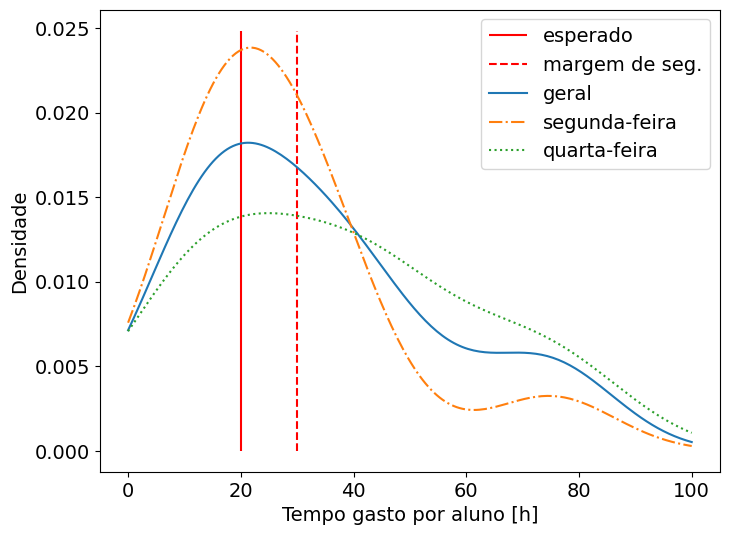

In [457]:
PA_4_x = np.linspace(0, 100, 200)

# general
density = gaussian_kde(PA_4)
PA_4_y = density(PA_4_x)

# monday
density = gaussian_kde(PA_4_monday)
PA_4_monday_y = density(PA_4_x)

# wednesday
density = gaussian_kde(PA_4_wednesday)
PA_4_wednesday_y = density(PA_4_x)

# top of the graph, for plotting purposes
PA_4_y_max = np.max([
    np.max(PA_4_y),
    np.max(PA_4_monday_y),
    np.max(PA_4_wednesday_y)
    ])
PA_4_graph_top = PA_4_y_max + 0.001

# Set the figure size
plt.figure(figsize=fig_default_size)

plt.vlines(PA_4_expected_hours, 0, PA_4_graph_top, linestyles='solid', color='r', label='esperado')
plt.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, PA_4_graph_top, linestyles='dashed', color='r', label='margem de seg.')

plt.plot(PA_4_x, PA_4_y, label='geral', linestyle='-')
plt.plot(PA_4_x, PA_4_monday_y, label='segunda-feira', linestyle='-.')
plt.plot(PA_4_x, PA_4_wednesday_y, label='quarta-feira', linestyle=':')
plt.xlabel("Tempo gasto por aluno [h]")
plt.ylabel("Densidade")
plt.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_density_kernels')
    
# showing the figure
plt.show()

In [458]:
# integrals
PA_4_step_size = PA_4_x[1] - PA_4_x[0]

# general
PA_4_kernel_integral_soft_exceeded = np.sum(PA_4_y[PA_4_x > PA_4_expected_hours])*PA_4_step_size
PA_4_kernel_integral_hard_exceeded = np.sum(PA_4_y[PA_4_x > PA_4_expected_hours + PA_4_expected_hours_safety_margin])*PA_4_step_size

# monday
PA_4_monday_kernel_integral_soft_exceeded = np.sum(PA_4_monday_y[PA_4_x > PA_4_expected_hours])*PA_4_step_size
PA_4_monday_kernel_integral_hard_exceeded = np.sum(PA_4_monday_y[PA_4_x > PA_4_expected_hours + PA_4_expected_hours_safety_margin])*PA_4_step_size

# wednesday
PA_4_wednesday_kernel_integral_soft_exceeded = np.sum(PA_4_wednesday_y[PA_4_x > PA_4_expected_hours])*PA_4_step_size
PA_4_wednesday_kernel_integral_hard_exceeded = np.sum(PA_4_wednesday_y[PA_4_x > PA_4_expected_hours + PA_4_expected_hours_safety_margin])*PA_4_step_size

PA_4_exceeded_resume = [
    {
        'soft': get_percentage_str(PA_4_kernel_integral_soft_exceeded),
        'hard': get_percentage_str(PA_4_kernel_integral_hard_exceeded)
    },
    {
        'soft': get_percentage_str(PA_4_monday_kernel_integral_soft_exceeded),
        'hard': get_percentage_str(PA_4_monday_kernel_integral_hard_exceeded)
    },
    {
        'soft': get_percentage_str(PA_4_wednesday_kernel_integral_soft_exceeded),
        'hard': get_percentage_str(PA_4_wednesday_kernel_integral_hard_exceeded)
    }
]

PA_4_exceeded_resume_table = pd.DataFrame(PA_4_exceeded_resume, index=PA_4_indexes)
PA_4_exceeded_resume_table


,soft,hard
general,67.15%,49.29%
monday,61.46%,38.29%
wednesday,70.31%,56.25%


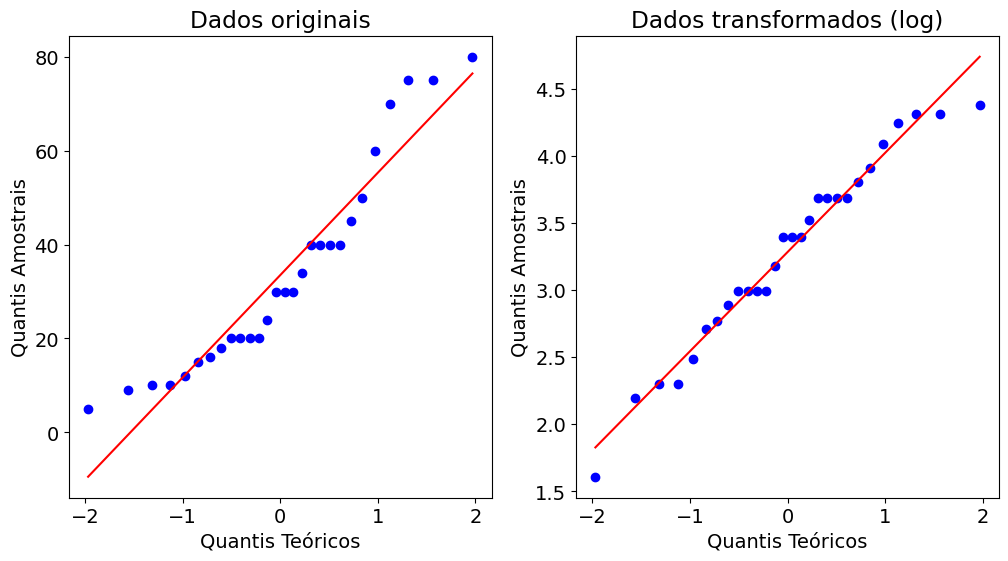

In [459]:
PA_4_log = np.log(PA_4)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(PA_4, dist="norm", plot=plt)
plt.title("Dados originais")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis Amostrais")

# Criar Q-Q plot para os dados transformados (log)
plt.subplot(1, 2, 2)
stats.probplot(PA_4_log, dist="norm", plot=plt)
plt.title("Dados transformados (log)")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis Amostrais")

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_qq_plots')
    
# showing the figure
plt.show()

In [460]:
PA_4_shapiro_test = stats.shapiro(PA_4)
PA_4_shapiro_test_log = stats.shapiro(PA_4_log)

PA_4_shapiro_test_p_value = PA_4_shapiro_test[1]
PA_4_shapiro_test_log_p_value = PA_4_shapiro_test_log[1]

PA_4_shapiro_test_result = PA_4_shapiro_test_p_value > critic_p_value
PA_4_shapiro_test_log_result = PA_4_shapiro_test_log_p_value > critic_p_value

print(f'original distribution\np-value: {PA_4_shapiro_test_p_value}\nsignificant: {PA_4_shapiro_test_result}\n')
print(f'log distribution\np-value: {PA_4_shapiro_test_log_p_value}\nsignificant: {PA_4_shapiro_test_log_result}')

original distribution
p-value: 0.013220934197306633
significant: False

log distribution
p-value: 0.5023230910301208
significant: True


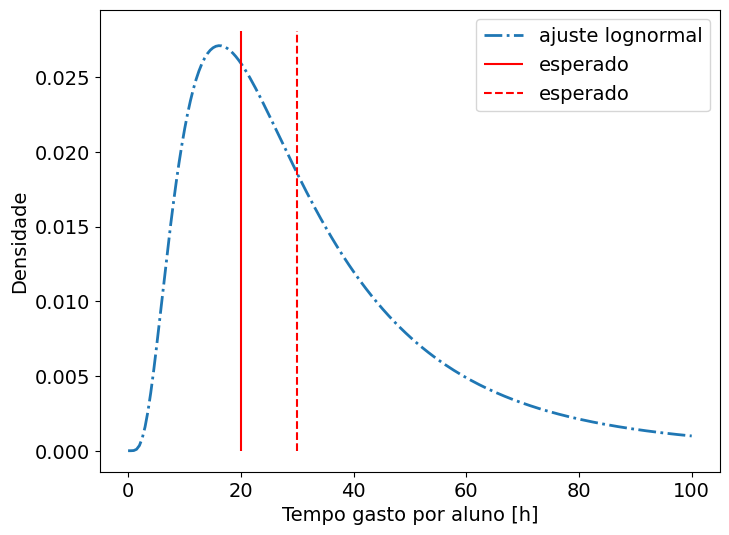

In [461]:
shape, loc, scale = lognorm.fit(PA_4, floc=0)

# lognormal fitting
PA_4_lognormal_y = lognorm.pdf(PA_4_x, shape, loc, scale)

PA_4_log_bins = np.arange(0, 140, 20)

PA_4_log_graph_top = np.max(PA_4_lognormal_y) + 0.001

# Plotar o histograma dos dados e a PDF ajustada
plt.figure(figsize=fig_default_size)
plt.plot(PA_4_x, PA_4_lognormal_y, lw=2, linestyle='-.', label='ajuste lognormal')

plt.vlines(PA_4_expected_hours, 0, PA_4_log_graph_top, linestyles='solid', color='r', label='esperado')
plt.vlines(PA_4_expected_hours + PA_4_expected_hours_safety_margin, 0, PA_4_log_graph_top, linestyles='dashed', color='r', label='esperado')

plt.xlabel("Tempo gasto por aluno [h]")
plt.ylabel("Densidade")
plt.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_4_lognormal_fit')
    
# showing the figure
plt.show()

In [462]:
PA_4_lognormal_soft_exceeded_integral = np.sum(PA_4_lognormal_y[PA_4_x > PA_4_expected_hours])*PA_4_step_size
PA_4_lognormal_hard_exceeded_integral = np.sum(PA_4_lognormal_y[PA_4_x > PA_4_expected_hours + PA_4_expected_hours_safety_margin])*PA_4_step_size

print(f'lognormal exceeded (soft): {PA_4_lognormal_soft_exceeded_integral}')
print(f'lognormal exceeded (hard): {PA_4_lognormal_hard_exceeded_integral}')

lognormal exceeded (soft): 0.6322223496494489
lognormal exceeded (hard): 0.4061170826203918


In [463]:
print(f'percentiles exceeded (soft): {1 - PA_4_lognormal_soft_exceeded_integral}')
print(f'percentiles exceeded (hard): {1 - PA_4_lognormal_hard_exceeded_integral}')

percentiles exceeded (soft): 0.3677776503505511
percentiles exceeded (hard): 0.5938829173796082


### PA_5
De forma geral, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito prejuízo]

In [464]:
PA_5 = df['PA_5']
PA_5_monday = monday_df['PA_5']
PA_5_wednesday = wednesday_df['PA_5']

PA_5.shape, PA_5_monday.shape, PA_5_wednesday.shape

((31,), (11,), (20,))

In [465]:
PA_5_counting = count_linkert(PA_5)
PA_5_monday_counting = count_linkert(PA_5_monday)
PA_5_wednesday_counting = count_linkert(PA_5_wednesday)

PA_5_counting, PA_5_monday_counting, PA_5_wednesday_counting

(array([ 2.,  5., 10.,  8.,  6.]),
 array([1., 2., 3., 2., 3.]),
 array([1., 3., 7., 6., 3.]))

In [466]:
PA_5_frequency = PA_5_counting/sum(PA_5_counting)
PA_5_monday_frequency = PA_5_monday_counting/sum(PA_5_monday_counting)
PA_5_wednesday_frequency = PA_5_wednesday_counting/sum(PA_5_wednesday_counting)

PA_5_frequency, PA_5_monday_frequency, PA_5_wednesday_frequency

(array([0.06451613, 0.16129032, 0.32258065, 0.25806452, 0.19354839]),
 array([0.09090909, 0.18181818, 0.27272727, 0.18181818, 0.27272727]),
 array([0.05, 0.15, 0.35, 0.3 , 0.15]))

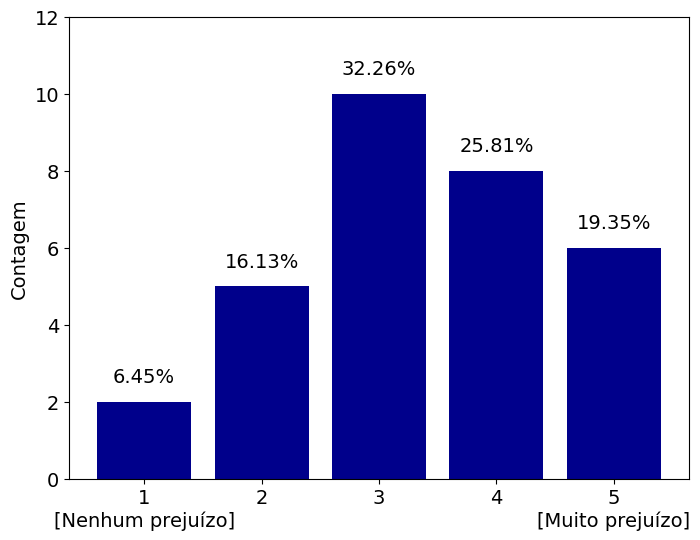

In [467]:
# plotting PA_5 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_5_categories = [
    '1\n[Nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[Muito prejuízo]',
]

axs.bar(PA_5_categories, PA_5_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_5_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_5_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 12)
# axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_5_general')
    
# showing the figure
plt.show()

Binarização dos dados

In [468]:
PA_5_bin_yes_counting = sum(PA_5_counting[2:5])
PA_5_bin_no_counting = sum(PA_5_counting[0:1])

print(f'PA_5 counting array: {PA_5_counting}')
print(f'PA_5 yes count: {PA_5_bin_yes_counting}')
print(f'PA_5 no count: {PA_5_bin_no_counting}')
print(f'PA_5 yes proportion: {PA_5_bin_yes_counting/PA_5.size}')

PA_5 counting array: [ 2.  5. 10.  8.  6.]
PA_5 yes count: 24.0
PA_5 no count: 2.0
PA_5 yes proportion: 0.7741935483870968


### PA_6
Durante as semanas de experimentos, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito]

In [469]:
PA_6 = df['PA_6']
PA_6_monday = monday_df['PA_6']
PA_6_wednesday = wednesday_df['PA_6']

PA_6.shape, PA_6_monday.shape, PA_6_wednesday.shape

((31,), (11,), (20,))

In [470]:
PA_6_counting = count_linkert(PA_6)
PA_6_monday_counting = count_linkert(PA_6_monday)
PA_6_wednesday_counting = count_linkert(PA_6_wednesday)

PA_6_counting, PA_6_monday_counting, PA_6_wednesday_counting

(array([ 8.,  8., 11.,  3.,  1.]),
 array([3., 4., 4., 0., 0.]),
 array([5., 4., 7., 3., 1.]))

In [471]:
PA_6_frequency = PA_6_counting/sum(PA_6_counting)
PA_6_monday_frequency = PA_6_monday_counting/sum(PA_6_monday_counting)
PA_6_wednesday_frequency = PA_6_wednesday_counting/sum(PA_6_wednesday_counting)

PA_6_frequency, PA_6_monday_frequency, PA_6_wednesday_frequency

(array([0.25806452, 0.25806452, 0.35483871, 0.09677419, 0.03225806]),
 array([0.27272727, 0.36363636, 0.36363636, 0.        , 0.        ]),
 array([0.25, 0.2 , 0.35, 0.15, 0.05]))

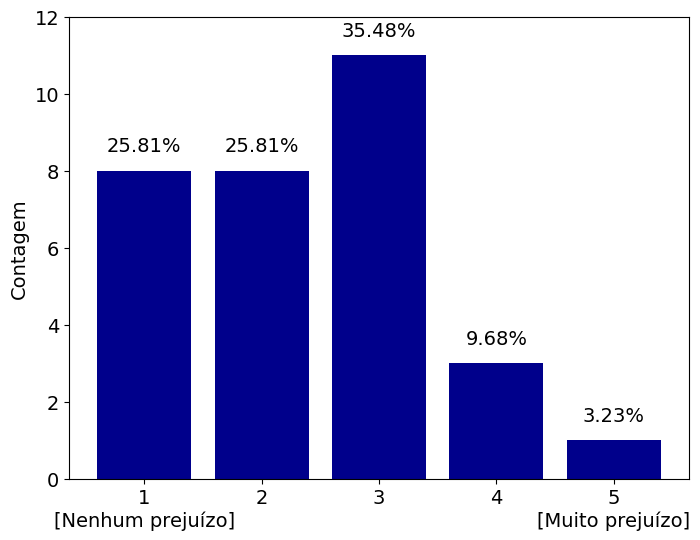

In [472]:
# plotting PA_6 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_6_categories = [
    '1\n[Nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[Muito prejuízo]',
]

axs.bar(PA_6_categories, PA_6_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_6_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_6_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 12)
# axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_6_general')
    
# showing the figure
plt.show()

In [473]:
PA_6_bin_yes_counting = sum(PA_6_counting[2:5])
PA_6_bin_no_counting = sum(PA_6_counting[0:1])

print(f'PA_6 counting array: {PA_6_counting}')
print(f'PA_6 yes count: {PA_6_bin_yes_counting}')
print(f'PA_6 no count: {PA_6_bin_no_counting}')
print(f'PA_6 yes proportion: {PA_6_bin_yes_counting/PA_6.size}')

PA_6 counting array: [ 8.  8. 11.  3.  1.]
PA_6 yes count: 15.0
PA_6 no count: 8.0
PA_6 yes proportion: 0.4838709677419355


### PA_7
Durante as semanas de projeto, você sofreu algum prejuízo acadêmico nas outras disciplinas do quadrimestre?
- (a) 1 [Nenhum prejuízo]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Muito]

In [474]:
PA_7 = df['PA_7']
PA_7_monday = monday_df['PA_7']
PA_7_wednesday = wednesday_df['PA_7']

PA_7.shape, PA_7_monday.shape, PA_7_wednesday.shape

((31,), (11,), (20,))

In [475]:
PA_7_counting = count_linkert(PA_7)
PA_7_monday_counting = count_linkert(PA_7_monday)
PA_7_wednesday_counting = count_linkert(PA_7_wednesday)

PA_7_counting, PA_7_monday_counting, PA_7_wednesday_counting

(array([ 2.,  2.,  8.,  9., 10.]),
 array([1., 1., 4., 0., 5.]),
 array([1., 1., 4., 9., 5.]))

In [476]:
PA_7_frequency = PA_7_counting/sum(PA_7_counting)
PA_7_monday_frequency = PA_7_monday_counting/sum(PA_7_monday_counting)
PA_7_wednesday_frequency = PA_7_wednesday_counting/sum(PA_7_wednesday_counting)

PA_7_frequency, PA_7_monday_frequency, PA_7_wednesday_frequency

(array([0.06451613, 0.06451613, 0.25806452, 0.29032258, 0.32258065]),
 array([0.09090909, 0.09090909, 0.36363636, 0.        , 0.45454545]),
 array([0.05, 0.05, 0.2 , 0.45, 0.25]))

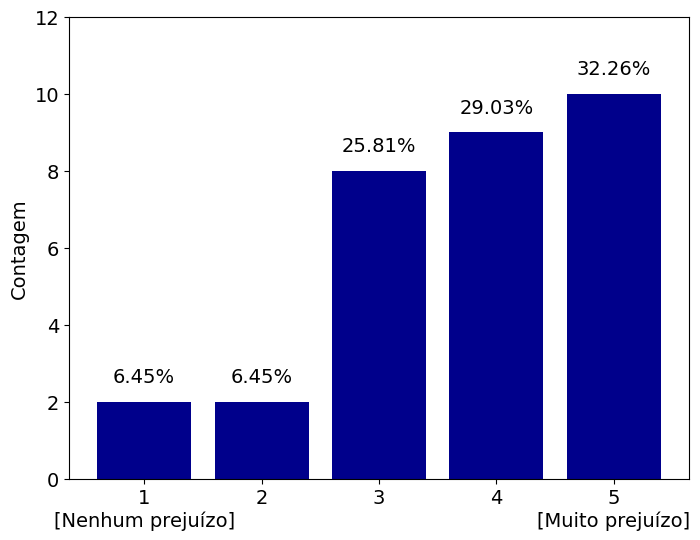

In [477]:
# plotting PA_6 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_7_categories = [
    '1\n[Nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[Muito prejuízo]',
]

axs.bar(PA_7_categories, PA_7_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_7_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_7_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 12)
# axs.set_xlabel('Avaliações')
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_7_general')
    
# showing the figure
plt.show()

In [478]:
PA_7_bin_yes_counting = sum(PA_7_counting[2:5])
PA_7_bin_no_counting = sum(PA_7_counting[0:1])

print(f'PA_7 counting array: {PA_7_counting}')
print(f'PA_7 yes count: {PA_7_bin_yes_counting}')
print(f'PA_7 no count: {PA_7_bin_no_counting}')
print(f'PA_7 yes proportion: {PA_7_bin_yes_counting/PA_7.size}')

PA_7 counting array: [ 2.  2.  8.  9. 10.]
PA_7 yes count: 27.0
PA_7 no count: 2.0
PA_7 yes proportion: 0.8709677419354839


In [479]:
PA_5_bin_ci_low, PA_5_bin_ci_high = sm.stats.proportion_confint(
    PA_5_bin_yes_counting,
    PA_5.size,
    alpha=0.05,
    method='normal'
    )

PA_6_bin_ci_low, PA_6_bin_ci_high = sm.stats.proportion_confint(
    PA_6_bin_yes_counting,
    PA_6.size,
    alpha=0.05,
    method='normal'
    )

PA_7_bin_ci_low, PA_7_bin_ci_high = sm.stats.proportion_confint(
    PA_7_bin_yes_counting,
    PA_7.size,
    alpha=0.05,
    method='normal'
    )

(PA_5_bin_ci_low, PA_5_bin_ci_high,
PA_6_bin_ci_low, PA_6_bin_ci_high,
PA_7_bin_ci_low, PA_7_bin_ci_high)

(0.6270096874670537,
 0.9213774093071398,
 0.3079526063380056,
 0.6597893291458654,
 0.7529581175586151,
 0.9889773663123527)

In [480]:
PA_5_6_7_academic_damage = [
    {
        'counting': PA_5_bin_yes_counting,
        'proportion': get_percentage_str(PA_5_bin_yes_counting/PA_5.size),
        'low_ci': get_percentage_str(PA_5_bin_ci_low),
        'high_ci': get_percentage_str(PA_5_bin_ci_high)
    },
    {
        'counting': PA_6_bin_yes_counting,
        'proportion': get_percentage_str(PA_6_bin_yes_counting/PA_5.size),
        'low_ci': get_percentage_str(PA_6_bin_ci_low),
        'high_ci': get_percentage_str(PA_6_bin_ci_high)
    },
    {
        'counting': PA_7_bin_yes_counting,
        'proportion': get_percentage_str(PA_7_bin_yes_counting/PA_5.size),
        'low_ci': get_percentage_str(PA_7_bin_ci_low),
        'high_ci': get_percentage_str(PA_7_bin_ci_high)
    }
]
PA_5_6_7_academic_damage_indexes = ['all over the discipline', 'experiment weeks', 'project weeks']
PA_5_6_7_academic_damage_table = pd.DataFrame(PA_5_6_7_academic_damage, index=PA_5_6_7_academic_damage_indexes)

PA_5_6_7_academic_damage_table

,counting,proportion,low_ci,high_ci
all over the discipline,24.0,77.42%,62.70%,92.14%
experiment weeks,15.0,48.39%,30.80%,65.98%
project weeks,27.0,87.10%,75.30%,98.90%


### PA_8
Se você sofreu prejuízo acadêmico nas outras disciplinas, quais dos seguintes itens se enquadram no seu caso? (deixar em branco, caso contrário)
- **[PA_8_1]** Se atrasar com o conteúdo outras disciplinas
- **[PA_8_2]** Perder aula de outras disciplinas
- **[PA_8_3]** Perda de desempenho nas provas
- **[PA_8_4]** Perda de desempenho nos testinhos de [PTC3007] - Sistemas e Sinais
- **[PA_8_5]** Falta de tempo para relatório de [MAP3122] - Cálculo Numérico
- **[PA_8_6]** Falta de tempo para o EP de [PCS3616] Sistemas de Programação
- **[PA_8_7]** Falta de tempo para o projeto de [PCS3623] Banco de Dados I
- **[PA_8_8]** Dificuldades com matérias do curso semestral (DP ou outros casos)
- **[PA_8_9]** Outros… [Texto Livre]

In [481]:
PA_8 = [df[f'PA_8_{i+1}'] for i in range(9)]
PA_8_monday = [monday_df[f'PA_8_{i+1}'] for i in range(9)]
PA_8_wednesday = [wednesday_df[f'PA_8_{i+1}'] for i in range(9)]

In [482]:
PA_8_size = df['PA_8'].dropna().shape[0]

PA_8_size

29

In [483]:
PS_8_counting = [sum(category) for category in PA_8]
PA_8_monday = [sum(category) for category in PA_8_monday]
PA_8_wednesday = [sum(category) for category in PA_8_wednesday]

PS_8_counting, PA_8_monday, PA_8_wednesday

([24, 24, 14, 17, 17, 13, 21, 4, 1],
 [8, 9, 5, 5, 7, 5, 7, 1, 0],
 [16, 15, 9, 12, 10, 8, 14, 3, 1])

In [484]:
PS_8_counting = [sum(category) for category in PA_8]
PS_8_frequency = [counting/PA_8_size for counting in PS_8_counting]

PS_8_counting, PS_8_frequency

([24, 24, 14, 17, 17, 13, 21, 4, 1],
 [0.8275862068965517,
  0.8275862068965517,
  0.4827586206896552,
  0.5862068965517241,
  0.5862068965517241,
  0.4482758620689655,
  0.7241379310344828,
  0.13793103448275862,
  0.034482758620689655])

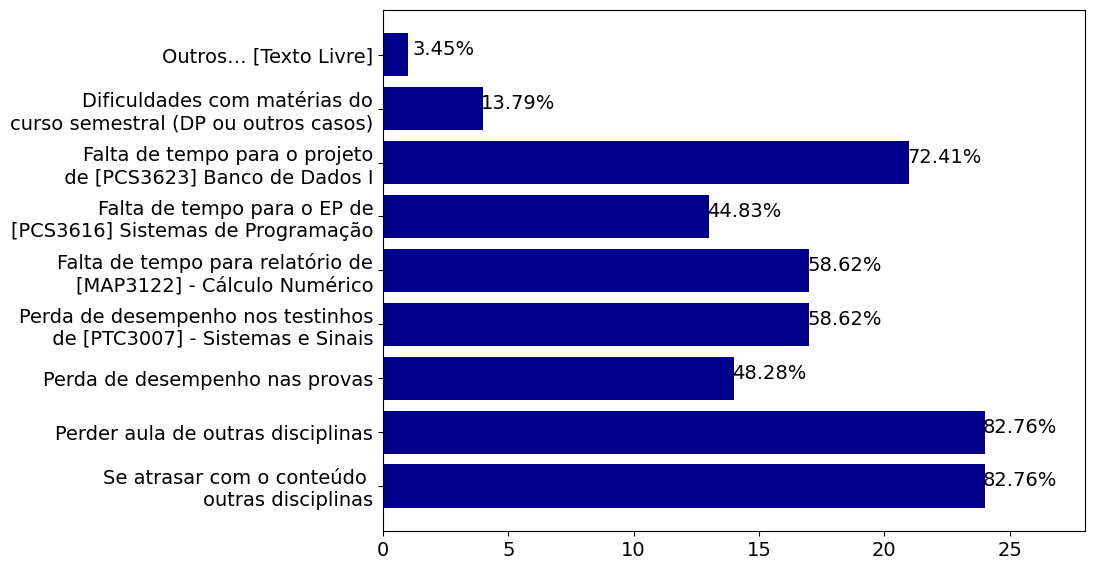

In [485]:
# plotting PA_8 (general)
fig, axs = plt.subplots(figsize=(8, 6))

# plt.rcParams.update({'font.size': 10})
plt.tight_layout()

PA_8_categories = [
    'Se atrasar com o conteúdo \noutras disciplinas',
    'Perder aula de outras disciplinas',
    'Perda de desempenho nas provas',
    'Perda de desempenho nos testinhos\n de [PTC3007] - Sistemas e Sinais',
    'Falta de tempo para relatório de\n[MAP3122] - Cálculo Numérico',
    'Falta de tempo para o EP de\n[PCS3616] Sistemas de Programação',
    'Falta de tempo para o projeto\n de [PCS3623] Banco de Dados I',
    'Dificuldades com matérias do\ncurso semestral (DP ou outros casos)',
    'Outros… [Texto Livre]'
]

axs.barh(PA_8_categories, PS_8_counting, color=fig_default_color)
axs.set_xlim(0, 28)

# text in the right of the bars
for i in range(9):
    x = PS_8_counting[i] + 0.7*right_bar_text_offset
    y = i
    percentage_str = get_percentage_str(fraction=PS_8_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_8_general')
    
# showing the figure
plt.show()

In [486]:
PA_8_df = df[['PA_8_1', 'PA_8_2', 'PA_8_3', 'PA_8_4', 'PA_8_5', 'PA_8_6', 'PA_8_7', 'PA_8_8', 'PA_8_9']]
PA_8_df_monday = monday_df[['PA_8_1', 'PA_8_2', 'PA_8_3', 'PA_8_4', 'PA_8_5', 'PA_8_6', 'PA_8_7', 'PA_8_8', 'PA_8_9']]
PA_8_df_wednesay = wednesday_df[['PA_8_1', 'PA_8_2', 'PA_8_3', 'PA_8_4', 'PA_8_5', 'PA_8_6', 'PA_8_7', 'PA_8_8', 'PA_8_9']]

PA_8_problems_per_person_counting = np.array(PA_8_df.apply(sum, axis=1))
PA_8_monday_problems_per_person_counting = np.array(PA_8_df_monday.apply(sum, axis=1))
PA_8_wednesday_problems_per_person_counting = np.array(PA_8_df_wednesay.apply(sum, axis=1))

PA_8_data = [
    PA_8_problems_per_person_counting,
    PA_8_monday_problems_per_person_counting,
    PA_8_wednesday_problems_per_person_counting
    ]

print(f'{PA_8_problems_per_person_counting}\n{PA_8_monday_problems_per_person_counting}\n{PA_8_wednesday_problems_per_person_counting}\n')

[7 8 2 5 0 8 4 7 7 7 5 5 4 3 0 3 3 7 1 7 5 2 5 0 6 6 4 3 4 4 3]
[7 8 0 7 5 0 1 5 5 6 3]
[2 5 8 4 7 7 5 4 3 3 3 7 7 2 0 6 4 4 4 3]



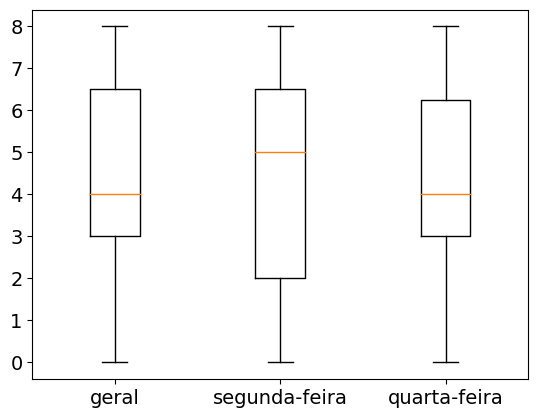

In [487]:
fig, axs = plt.subplots()
axs.boxplot(PA_8_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_8_boxplot')
    
# showing the figure
plt.show()

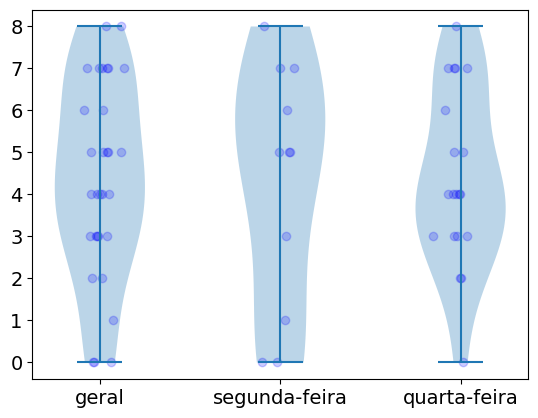

In [488]:
fig, axs = plt.subplots()
axs.violinplot(PA_8_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])

# jitter points
for i, data_point in enumerate(PA_8_data):
    y = data_point
    x = np.random.normal(loc=i + 1, scale=0.05, size=len(data_point))
    plt.scatter(x, y, alpha=0.2, color='blue', label='pontos')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_8_violinplot')
    
# showing the figure
plt.show()


In [489]:
PA_8_statistical_resume = [statistical_resume(PA_8_data[0]),
statistical_resume(PA_8_data[1]),
statistical_resume(PA_8_data[2])]

PA_8_statistical_resume_indexes = ['general', 'monday', 'wednesday']
PA_8_statistical_resume_table = pd.DataFrame(PA_8_statistical_resume, index=PA_8_statistical_resume_indexes)

PA_8_statistical_resume_table

,média,mediana,desvio padrão,1º quartil,3º quartil,mínimo,máximo
general,4.354839,4.0,2.307748,3.0,6.50,0,8
monday,4.272727,5.0,2.733327,2.0,6.50,0,8
wednesday,4.400000,4.0,2.034699,3.0,6.25,0,8


In [490]:
PA_8_problems_per_person_counting_data = []
PA_8_problems_per_person_counting_labels = range(0,9)
PA_8_problems_per_person_counting_sum = sum(PA_8_problems_per_person_counting_labels)

for i in PA_8_problems_per_person_counting_labels:
    counting = len(PA_8_problems_per_person_counting[PA_8_problems_per_person_counting == i])
    PA_8_problems_per_person_counting_data.append({'quantity': i, 'counting': counting, 'frequency': counting/PA_8_problems_per_person_counting_sum})

PA_8_problems_per_person_counting_df = pd.DataFrame(PA_8_problems_per_person_counting_data)
PA_8_problems_per_person_counting_df

,quantity,counting,frequency
0,0,3,0.083333
1,1,1,0.027778
2,2,2,0.055556
3,3,5,0.138889
4,4,5,0.138889
5,5,5,0.138889
6,6,2,0.055556
7,7,6,0.166667
8,8,2,0.055556


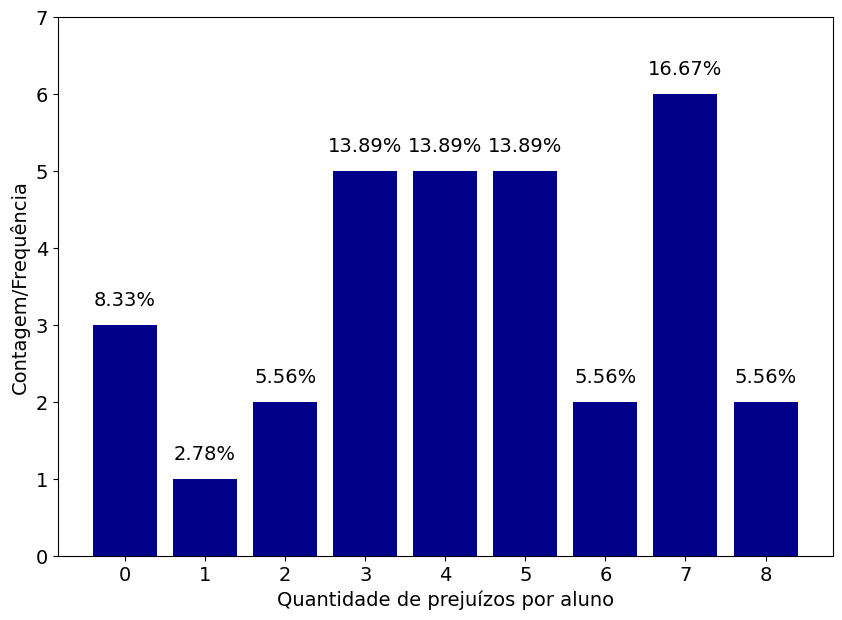

In [491]:
# plotting PA_8 (general)
fig, axs = plt.subplots(figsize=(10, 7))

axs.bar(PA_8_problems_per_person_counting_labels, PA_8_problems_per_person_counting_df['counting'], color=fig_default_color)
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.yticks([0,1,2,3,4,5,6,7,8])

# text in the top of the bars
for i in PA_8_problems_per_person_counting_labels:
    x = i
    y = PA_8_problems_per_person_counting_df['counting'][i] + 0.5*top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_8_problems_per_person_counting_df['frequency'][i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 7)
axs.set_xlabel('Quantidade de prejuízos por aluno')
axs.set_ylabel('Contagem/Frequência')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_8_bar_counting')
    
# showing the figure
plt.show()

### PA_9
Se você perdeu aulas para fazer o projeto da disciplina, diga uma estimativa da quantidade de aulas perdidas, caso você a tenha. [Texto Livre]

In [492]:
PA_9 = df['PA_9'].dropna()
PA_9_monday = monday_df['PA_9'].dropna()
PA_9_wednesday = wednesday_df['PA_9'].dropna()

PA_9.size, PA_9_monday.size, PA_9_wednesday.size

(28, 9, 19)

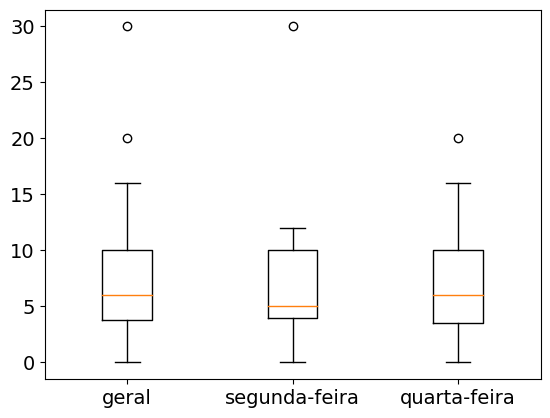

In [493]:
fig, axs = plt.subplots()

PA_9_data = [PA_9, PA_9_monday, PA_9_wednesday]
axs.boxplot(PA_9_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_9_boxplot')
    
# showing the figure
plt.show()

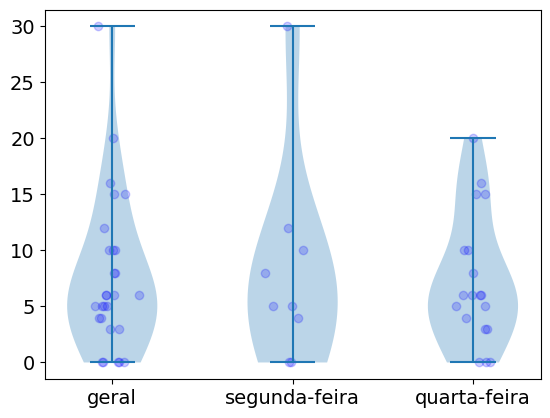

In [494]:
fig, axs = plt.subplots()
axs.violinplot(PA_9_data)
plt.xticks([1, 2, 3], ['geral', 'segunda-feira', 'quarta-feira'])

# jitter points
for i, data_point in enumerate(PA_9_data):
    y = data_point
    x = np.random.normal(loc=i + 1, scale=0.05, size=len(data_point))
    plt.scatter(x, y, alpha=0.2, color='blue', label='pontos')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_9_violinplot')
    
# showing the figure
plt.show()


In [495]:
PA_9_statistical_resume = [statistical_resume(PA_9_data[0]),
statistical_resume(PA_9_data[1]),
statistical_resume(PA_9_data[2])]

PA_9_statistical_resume_indexes = ['general', 'monday', 'wednesday']
PA_9_statistical_resume_table = pd.DataFrame(PA_9_statistical_resume, index=PA_9_statistical_resume_indexes)

PA_9_statistical_resume_table

,média,mediana,desvio padrão,1º quartil,3º quartil,mínimo,máximo
general,7.571429,6.0,6.726433,3.75,10.0,0.0,30.0
monday,8.222222,5.0,8.599454,4.00,10.0,0.0,30.0
wednesday,7.263158,6.0,5.599268,3.50,10.0,0.0,20.0


In [496]:
PA_9_bins = int(np.round(1 + np.log2(PA_9.size)))
PA_9_bins

6

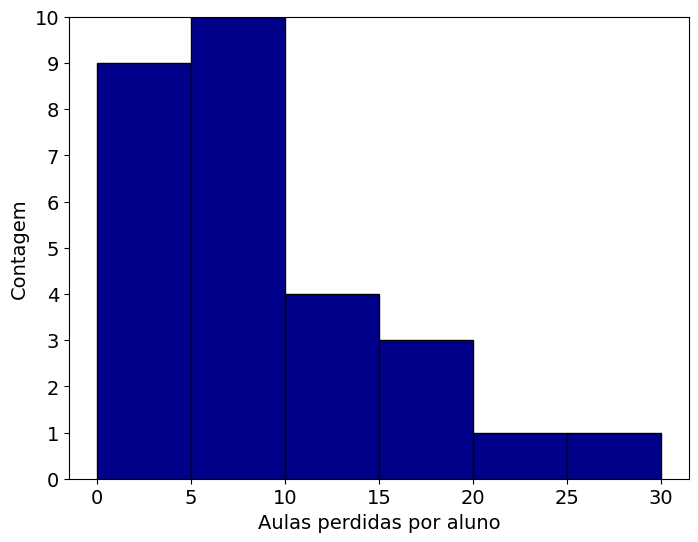

In [497]:
# plotting PA_4 histogram for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(PA_9, bins=PA_9_bins, color=fig_default_color, edgecolor='black')
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_ylim(0, 10)

axs.set_xlabel('Aulas perdidas por aluno')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_9_histogram')
    
# showing the figure
plt.show()

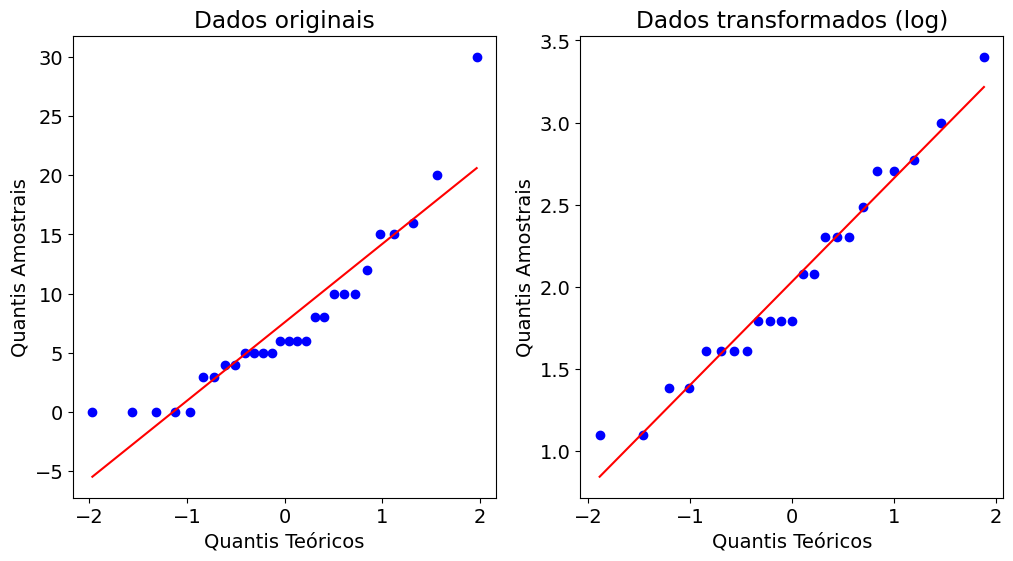

In [498]:
PA_9_log = np.log(PA_9[PA_9 != 0])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(PA_9, dist="norm", plot=plt)
plt.title("Dados originais")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis Amostrais")

# Criar Q-Q plot para os dados transformados (log)
plt.subplot(1, 2, 2)
stats.probplot(PA_9_log, dist="norm", plot=plt)
plt.title("Dados transformados (log)")
plt.xlabel("Quantis Teóricos")
plt.ylabel("Quantis Amostrais")

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_9_qq_plots')
    
# showing the figure
plt.show()

In [499]:
PA_9_shapiro_test = stats.shapiro(PA_9)
PA_9_shapiro_test_log = stats.shapiro(PA_9_log)

PA_9_shapiro_test_p_value = PA_9_shapiro_test[1]
PA_9_shapiro_test_log_p_value = PA_9_shapiro_test_log[1]

PA_9_shapiro_test_result = PA_9_shapiro_test_p_value > critic_p_value
PA_9_shapiro_test_log_result = PA_9_shapiro_test_log_p_value > critic_p_value

print(f'original distribution\np-value: {PA_9_shapiro_test_p_value}\nsignificant: {PA_9_shapiro_test_result}\n')
print(f'log distribution\np-value: {PA_9_shapiro_test_log_p_value}\nsignificant: {PA_9_shapiro_test_log_result}')

original distribution
p-value: 0.0020897872745990753
significant: False

log distribution
p-value: 0.4400758445262909
significant: True


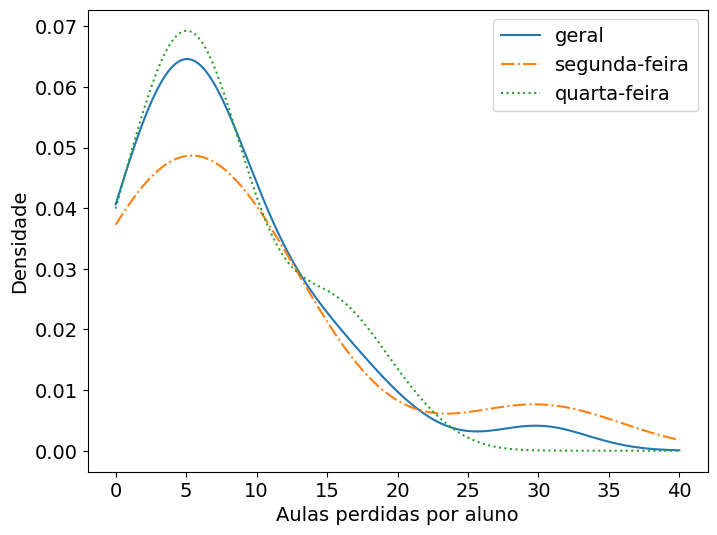

In [500]:
PA_9_x = np.linspace(0, 40, 200)

# general
density = gaussian_kde(PA_9)
PA_9_y = density(PA_9_x)

# monday
density = gaussian_kde(PA_9_monday)
PA_9_monday_y = density(PA_9_x)

# wednesday
density = gaussian_kde(PA_9_wednesday)
PA_9_wednesday_y = density(PA_9_x)

# top of the graph, for plotting purposes
PA_9_y_max = np.max([
    np.max(PA_9_y),
    np.max(PA_9_monday_y),
    np.max(PA_9_wednesday_y)
    ])
PA_9_graph_top = PA_9_y_max + 0.001

# Set the figure size
plt.figure(figsize=fig_default_size)

plt.plot(PA_9_x, PA_9_y, label='geral', linestyle='-')
plt.plot(PA_9_x, PA_9_monday_y, label='segunda-feira', linestyle='-.')
plt.plot(PA_9_x, PA_9_wednesday_y, label='quarta-feira', linestyle=':')
plt.xlabel("Aulas perdidas por aluno")
plt.ylabel("Densidade")
plt.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_9_density_kernels')
    
# showing the figure
plt.show()

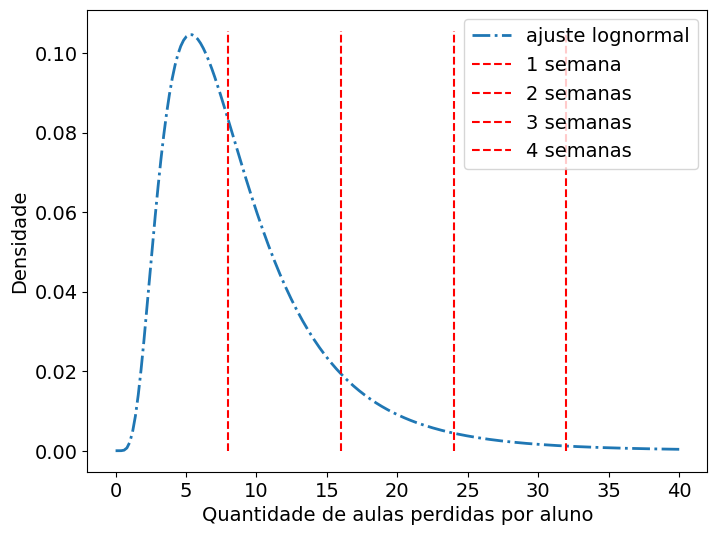

In [501]:
shape, loc, scale = lognorm.fit(PA_9[PA_9 != 0], floc=0)

# lognormal fitting
PA_9_lognormal_y = lognorm.pdf(PA_9_x, shape, loc, scale)

PA_9_log_bins = np.arange(0, 140, 20)

PA_9_log_graph_top = np.max(PA_9_lognormal_y) + 0.001

# Plotar o histograma dos dados e a PDF ajustada
plt.figure(figsize=fig_default_size)
plt.plot(PA_9_x, PA_9_lognormal_y, lw=2, linestyle='-.', label='ajuste lognormal')

plt.vlines(8, 0, PA_9_log_graph_top, linestyles='dashed', color='r', label='1 semana')
plt.vlines(16, 0, PA_9_log_graph_top, linestyles='dashed', color='r', label='2 semanas')
plt.vlines(24, 0, PA_9_log_graph_top, linestyles='dashed', color='r', label='3 semanas')
plt.vlines(32, 0, PA_9_log_graph_top, linestyles='dashed', color='r', label='4 semanas')

plt.xlabel("Quantidade de aulas perdidas por aluno")
plt.ylabel("Densidade")
plt.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_9_lognormal_fit')
    
# showing the figure
plt.show()

In [502]:
# integrals
PA_9_step_size = PA_9_x[1] - PA_9_x[0]

PA_9_indexes = ['one_week', 'two_week', 'three_weeks', 'four_weeks']

# general
PA_9_kernel_integral_one_week_exceeded = np.sum(PA_9_y[PA_9_x >= 8])*PA_9_step_size
PA_9_kernel_integral_two_weeks_exceeded = np.sum(PA_9_y[PA_9_x >= 16])*PA_9_step_size
PA_9_kernel_integral_three_weeks_exceeded = np.sum(PA_9_y[PA_9_x >= 24])*PA_9_step_size
PA_9_kernel_integral_four_weeks_exceeded = np.sum(PA_9_y[PA_9_x >= 32])*PA_9_step_size

PA_9_exceeded_resume = [
    {
        'proportion': get_percentage_str(PA_9_kernel_integral_one_week_exceeded),
        'percentile': get_percentage_str(1 - PA_9_kernel_integral_one_week_exceeded)
    },
    {
        'proportion': get_percentage_str(PA_9_kernel_integral_two_weeks_exceeded),
        'percentile': get_percentage_str(1 - PA_9_kernel_integral_two_weeks_exceeded)
    },
    {
        'proportion': get_percentage_str(PA_9_kernel_integral_three_weeks_exceeded),
        'percentile': get_percentage_str(1 - PA_9_kernel_integral_three_weeks_exceeded)
    },
    {
        'proportion': get_percentage_str(PA_9_kernel_integral_four_weeks_exceeded),
        'percentile': get_percentage_str(1 - PA_9_kernel_integral_four_weeks_exceeded)
    }
]

PA_9_exceeded_resume_table = pd.DataFrame(PA_9_exceeded_resume, index=PA_9_indexes)
PA_9_exceeded_resume_table


,proportion,percentile
one_week,40.88%,59.12%
two_week,12.33%,87.67%
three_weeks,3.94%,96.06%
four_weeks,0.99%,99.01%


### PA_10
Numa escala de 1 a 5, qual o seu grau de satisfação geral com o tempo despendido em Lab Dig?
- (a) 1 [Muito insatisfeita(o)]
- (a) 2
- (a) 3
- (a) 4
- (a) 5 [Muito satisfeita(o)]


In [503]:
PA_10 = df['PA_10']
PA_10_monday = monday_df['PA_10']
PA_10_wednesday = wednesday_df['PA_10']

PA_10.shape, PA_10_monday.shape, PA_10_wednesday.shape

((31,), (11,), (20,))

In [504]:
PA_10_counting = count_linkert(PA_10)
PA_10_monday_counting = count_linkert(PA_10_monday)
PA_10_wednesday_counting = count_linkert(PA_10_wednesday)

pd.DataFrame([PA_10_counting, PA_10_monday_counting, PA_10_wednesday_counting])

,0,1,2,3,4
0,8.0,12.0,6.0,5.0,0.0
1,3.0,4.0,1.0,3.0,0.0
2,5.0,8.0,5.0,2.0,0.0


In [505]:
PA_10_frequency = PA_10_counting/sum(PA_10_counting)
PA_10_monday_frequency = PA_10_monday_counting/sum(PA_10_monday_counting)
PA_10_wednesday_frequency = PA_10_wednesday_counting/sum(PA_10_wednesday_counting)

pd.DataFrame([PA_10_frequency, PA_10_monday_frequency, PA_10_wednesday_frequency])

,0,1,2,3,4
0,0.258065,0.387097,0.193548,0.161290,0.0
1,0.272727,0.363636,0.090909,0.272727,0.0
2,0.250000,0.400000,0.250000,0.100000,0.0


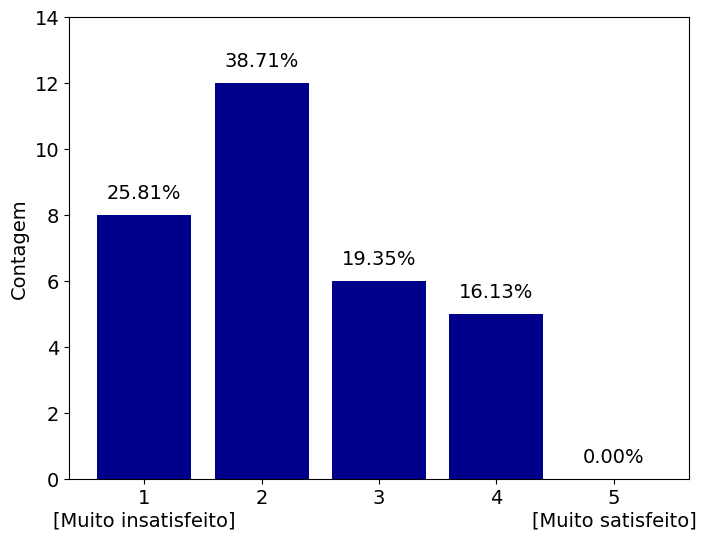

In [702]:
# plotting PA_6 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PA_10_categories = [
    '1\n[Muito insatisfeito]',
    '2',
    '3',
    '4',
    '5\n[Muito satisfeito]',
]

axs.bar(PA_10_categories, PA_10_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PA_10_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PA_10_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 14)
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_10_general')
    
# showing the figure
plt.show()

### PA_11
Numa escala de 1 a 5, como você avalia a especificação de requisitos do projeto, nas semanas 0.1 e 0.2, nos aspectos abaixo? [Escala de 1 a 5 para cada item]
- **PA_11_1** plausibilidade técnica, dentro do prazo proposto	
- **PA_11_2** coerência com o conteúdo dado na disciplina	
- **PA_11_3** flexibilidade com o projeto, para que o grupo pudesse optar por algo mais simples	
- **PA_11_4** clareza da orientação	
- **PA_11_5** comunicação dos docentes	
- **PA_11_6** complexidade do projeto, de forma geral	


In [703]:
PA_11_labels = ['PA_11_1', 'PA_11_2', 'PA_11_3', 'PA_11_4', 'PA_11_5', 'PA_11_6']
PA_11 = df[PA_11_labels].dropna()

PA_11['PA_11_1_2_3_AVG'] = PA_11[['PA_11_1', 'PA_11_2', 'PA_11_3']].apply(np.average, axis=1)
PA_11['PA_11_4_5_6_AVG'] = PA_11[['PA_11_4', 'PA_11_5', 'PA_11_6']].apply(np.average, axis=1)
PA_11['PA_11_AVG'] = PA_11.apply(np.average, axis=1)

PA_11

,PA_11_1,PA_11_2,PA_11_3,PA_11_4,PA_11_5,PA_11_6,PA_11_1_2_3_AVG,PA_11_4_5_6_AVG,PA_11_AVG
0,3.0,2.0,3.0,3.0,3.0,3.0,2.666667,3.000000,2.833333
1,4.0,2.0,3.0,3.0,3.0,3.0,3.000000,3.000000,3.000000
2,4.0,4.0,5.0,5.0,5.0,3.0,4.333333,4.333333,4.333333
3,3.0,2.0,4.0,4.0,4.0,3.0,3.000000,3.666667,3.333333
4,5.0,4.0,2.0,4.0,4.0,3.0,3.666667,3.666667,3.666667
5,2.0,2.0,3.0,4.0,3.0,2.0,2.333333,3.000000,2.666667
6,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.000000,3.000000
7,1.0,4.0,1.0,2.0,2.0,2.0,2.000000,2.000000,2.000000
8,1.0,1.0,1.0,1.0,2.0,5.0,1.000000,2.666667,1.833333
9,1.0,4.0,2.0,2.0,3.0,2.0,2.333333,2.333333,2.333333


In [508]:
PA_11_resume = [
    {'question': 'PA_11_1', 'mean': PA_11['PA_11_1'].mean()},
    {'question': 'PA_11_2', 'mean': PA_11['PA_11_2'].mean()},
    {'question': 'PA_11_3', 'mean': PA_11['PA_11_3'].mean()},
    {'question': 'PA_11_4', 'mean': PA_11['PA_11_4'].mean()},
    {'question': 'PA_11_5', 'mean': PA_11['PA_11_5'].mean()},
    {'question': 'PA_11_6', 'mean': PA_11['PA_11_6'].mean()},
]

pd.DataFrame(PA_11_resume)

,question,mean
0,PA_11_1,2.448276
1,PA_11_2,2.793103
2,PA_11_3,2.689655
3,PA_11_4,2.517241
4,PA_11_5,2.758621
5,PA_11_6,2.758621


In [707]:
PA_11_counting = [count_linkert(PA_11[label]) for label in PA_11_labels]
PA_11_counting

[array([7., 9., 7., 5., 1.]),
 array([ 3., 11.,  6.,  7.,  2.]),
 array([ 5.,  6., 12.,  5.,  1.]),
 array([7., 7., 9., 5., 1.]),
 array([ 5.,  5., 13.,  4.,  2.]),
 array([ 2.,  9., 13.,  4.,  1.])]

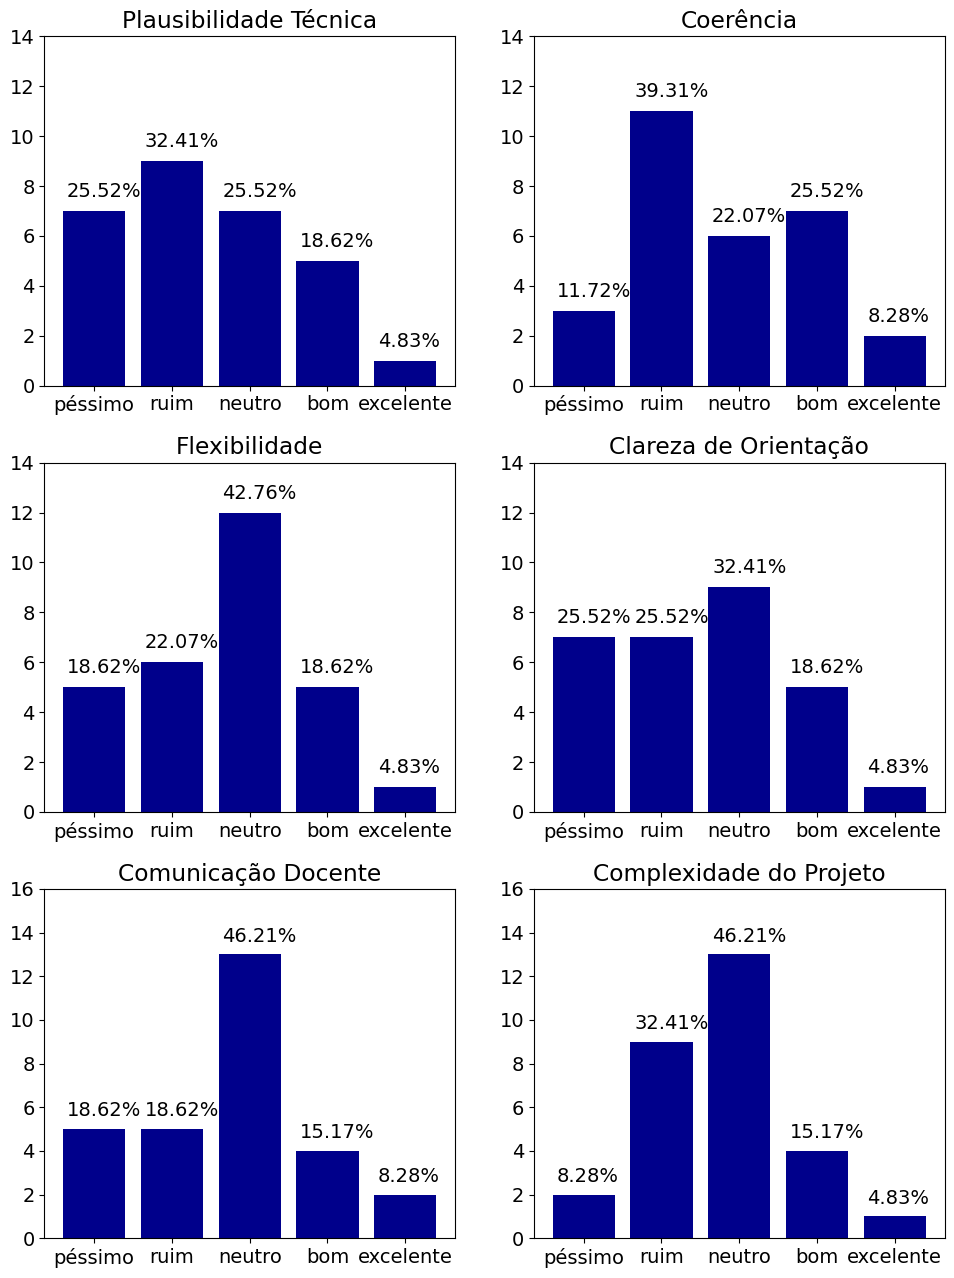

In [719]:
# Dados de contagem para os 5 conjuntos
data = PA_11_counting

PA_11_aspects = [
    'Plausibilidade Técnica',
    'Coerência',
    'Flexibilidade',
    'Clareza de Orientação',
    'Comunicação Docente',
    'Complexidade do Projeto'
    ]

PA_11_labels = ['péssimo', 'ruim', 'neutro', 'bom', 'excelente']
PA_11_y_tops = [14, 14, 14, 14, 16, 16]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 13), sharey=False)

# Achatar a matriz de subplots para iteração fácil
axs = axs.flatten()

for i, ax in enumerate(axs):
    if i < len(data):
        counts = data[i]
        
        # bar plot
        bars = ax.bar(PA_11_labels, counts, color=fig_default_color)
        
        ax.set_ylim(0, PA_11_y_tops[i])
        # ax.set_ylabel('Contagem')
        
        # var top text
        for j, bar in enumerate(bars):
            x = j - 0.35
            y = bar.get_height() + 0.40
            percentage_str = get_percentage_str(y/PA_11['PA_11_1'].size)
            ax.text(x, y, percentage_str, va='bottom')
        
        ax.set_title(f'{PA_11_aspects[i]}')
    else:
        # removing the empty plot space
        ax.axis('off')

plt.tight_layout()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_11_general')
    
# showing the figure
plt.show()


In [771]:
PA_11_scores = [5 + 2.5*np.dot(aspect, np.array([-2, -1, 0, 1, 2]))/sum(aspect) for aspect in PA_11_counting]
PA_11_table_indexes = [0, 1, 2, 3, 4, 5]
PA_11_table = pd.DataFrame({'aspects': PA_11_aspects, 'scores': PA_11_scores})
PA_11_table

,aspects,scores
0,Plausibilidade Técnica,3.620690
1,Coerência,4.482759
2,Flexibilidade,4.224138
3,Clareza de Orientação,3.793103
4,Comunicação Docente,4.396552
5,Complexidade do Projeto,4.396552


### PA_12
Qual o seu grau de satisfação com a disciplina quanto aos elementos abaixo? [respostas possíveis são Muito Insatisfeito(a), Insatisfeito(a), Neutro(a), Satisfeito(a) e Muito Satisfeito(a)]
- **[PA_12_1]** A Disciplina em Geral	
- **[PA_12_2]** Semanas de Experimento	
- **[PA_12_3]** Semanas de Projeto	
- **[PA_12_4]** Quantidade de relatórios	
- **[PA_12_5]** Complexidade dos relatórios	
- **[PA_12_6]** Uso do tempo de sala	
- **[PA_12_7]** Uso do tempo fora de sala	
- **[PA_12_8]** Comunicação com os docentes	
- **[PA_12_9]** Flexibilidade dos docentes	

In [748]:
PA_12_labels = [
    'PA_12_1', 'PA_12_2', 'PA_12_3',
    'PA_12_4', 'PA_12_5', 'PA_12_6',
    'PA_12_7', 'PA_12_8', 'PA_12_9'
]
PA_12 = df[PA_12_labels]

PA_12

,PA_12_1,PA_12_2,PA_12_3,PA_12_4,PA_12_5,PA_12_6,PA_12_7,PA_12_8,PA_12_9
0,3,4,2,1,1,3,2,3,4
1,3,5,2,3,3,2,1,3,3
2,4,4,4,3,3,4,2,3,3
3,4,4,2,1,2,2,3,4,4
4,5,5,5,5,4,5,4,5,4
5,4,4,3,2,2,4,2,5,5
6,4,4,4,4,3,3,3,3,3
7,4,5,3,3,2,4,1,3,3
8,1,4,1,2,2,2,1,1,1
9,3,4,1,1,1,2,1,2,1


In [749]:
PA_12_counting = [count_linkert(PA_12[label]) for label in PA_12_labels]
PA_12_counting

[array([ 4.,  1.,  9., 14.,  3.]),
 array([ 1.,  1.,  1., 19.,  9.]),
 array([ 7., 10.,  7.,  6.,  1.]),
 array([ 8., 11.,  7.,  4.,  1.]),
 array([7., 8., 9., 6., 1.]),
 array([ 2.,  8.,  6., 11.,  4.]),
 array([11., 11.,  7.,  2.,  0.]),
 array([ 2.,  6., 12.,  6.,  5.]),
 array([ 3.,  2., 12., 13.,  1.])]

In [750]:
PA_12_resume = [
    {'question': 'PA_12_1', 'mean': PA_12['PA_12_1'].mean()},
    {'question': 'PA_12_2', 'mean': PA_12['PA_12_2'].mean()},
    {'question': 'PA_12_3', 'mean': PA_12['PA_12_3'].mean()},
    {'question': 'PA_12_4', 'mean': PA_12['PA_12_4'].mean()},
    {'question': 'PA_12_5', 'mean': PA_12['PA_12_5'].mean()},
    {'question': 'PA_12_6', 'mean': PA_12['PA_12_6'].mean()},
    {'question': 'PA_12_7', 'mean': PA_12['PA_12_7'].mean()},
    {'question': 'PA_12_8', 'mean': PA_12['PA_12_8'].mean()},
    {'question': 'PA_12_9', 'mean': PA_12['PA_12_9'].mean()},
]

PA_12_resume_table = pd.DataFrame(PA_12_resume)
PA_12_resume_table

,question,mean
0,PA_12_1,3.354839
1,PA_12_2,4.096774
2,PA_12_3,2.483871
3,PA_12_4,2.322581
4,PA_12_5,2.548387
5,PA_12_6,3.225806
6,PA_12_7,2.000000
7,PA_12_8,3.193548
8,PA_12_9,3.225806


In [751]:
PA_12_resume_table['mean'] = PA_12_resume_table['mean'].apply(lambda x: (10/4)*(x-1))
PA_12_resume_table

,question,mean
0,PA_12_1,5.887097
1,PA_12_2,7.741935
2,PA_12_3,3.709677
3,PA_12_4,3.306452
4,PA_12_5,3.870968
5,PA_12_6,5.564516
6,PA_12_7,2.500000
7,PA_12_8,5.483871
8,PA_12_9,5.564516


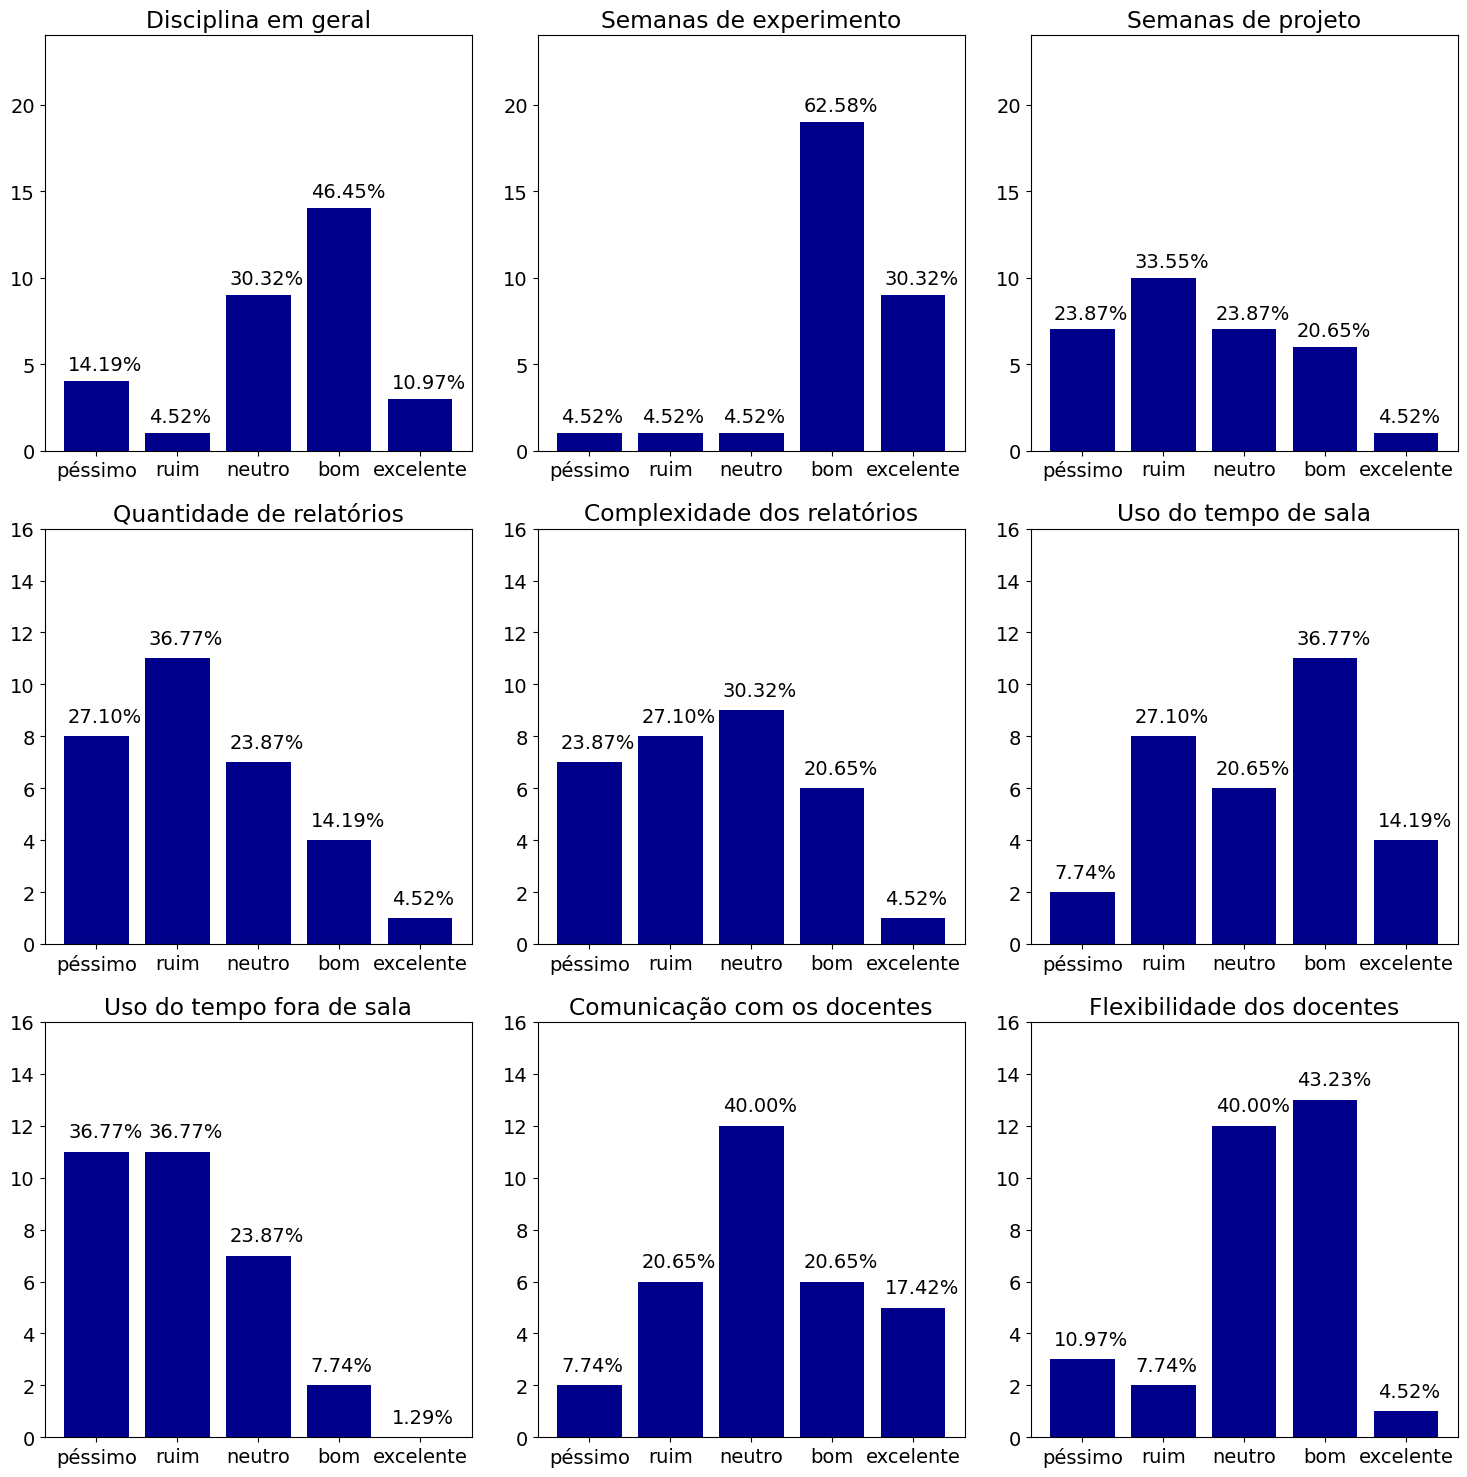

In [752]:
# Dados de contagem para os 5 conjuntos
data = PA_12_counting

PA_12_aspects = [
    'Disciplina em geral',
    'Semanas de experimento',
    'Semanas de projeto',
    'Quantidade de relatórios',
    'Complexidade dos relatórios',
    'Uso do tempo de sala',
    'Uso do tempo fora de sala',
    'Comunicação com os docentes',
    'Flexibilidade dos docentes'
    ]

PA_12_labels = ['péssimo', 'ruim', 'neutro', 'bom', 'excelente']
PA_12_y_tops = [24, 24, 24, 16, 16, 16, 16, 16, 16]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharey=False)

# Achatar a matriz de subplots para iteração fácil
axs = axs.flatten()

for i, ax in enumerate(axs):
    if i < len(data):
        counts = data[i]
        
        # bar plot
        bars = ax.bar(PA_12_labels, counts, color=fig_default_color)
        
        ax.set_ylim(0, PA_12_y_tops[i])
        # ax.set_ylabel('Contagem')
        
        # var top text
        for j, bar in enumerate(bars):
            x = j - 0.35
            y = bar.get_height() + 0.40
            percentage_str = get_percentage_str(y/PA_12['PA_12_1'].size)
            ax.text(x, y, percentage_str, va='bottom')
        
        ax.set_title(f'{PA_12_aspects[i]}')
    else:
        # removing the empty plot space
        ax.axis('off')

plt.tight_layout()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_12_general')
    
# showing the figure
plt.show()


## Pesquisa de Saúde

### PS_1
Você sentiu algum prejuízo em termos de saúde mental?
- (a) 1 [Não, estou bem]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Sim, e muito]

    

In [511]:
PS_1 = df['PS_1']
PS_1_monday = monday_df['PS_1']
PS_1_wednesday = wednesday_df['PS_1']

PS_1.shape, PS_1_monday.shape, PS_1_wednesday.shape

((31,), (11,), (20,))

In [512]:
PS_1_counting = count_linkert(PS_1)
PS_1_monday_counting = count_linkert(PS_1_monday)
PS_1_wednesday_counting = count_linkert(PS_1_wednesday)

pd.DataFrame([PS_1_counting, PS_1_monday_counting, PS_1_wednesday_counting])

,0,1,2,3,4
0,7.0,11.0,5.0,5.0,3.0
1,4.0,2.0,1.0,2.0,2.0
2,3.0,9.0,4.0,3.0,1.0


In [513]:
PS_1_frequency = PS_1_counting/sum(PS_1_counting)
PS_1_monday_frequency = PS_1_monday_counting/sum(PS_1_monday_counting)
PS_1_wednesday_frequency = PS_1_wednesday_counting/sum(PS_1_wednesday_counting)

pd.DataFrame([PS_1_frequency, PS_1_monday_frequency, PS_1_wednesday_frequency])

,0,1,2,3,4
0,0.225806,0.354839,0.161290,0.161290,0.096774
1,0.363636,0.181818,0.090909,0.181818,0.181818
2,0.150000,0.450000,0.200000,0.150000,0.050000


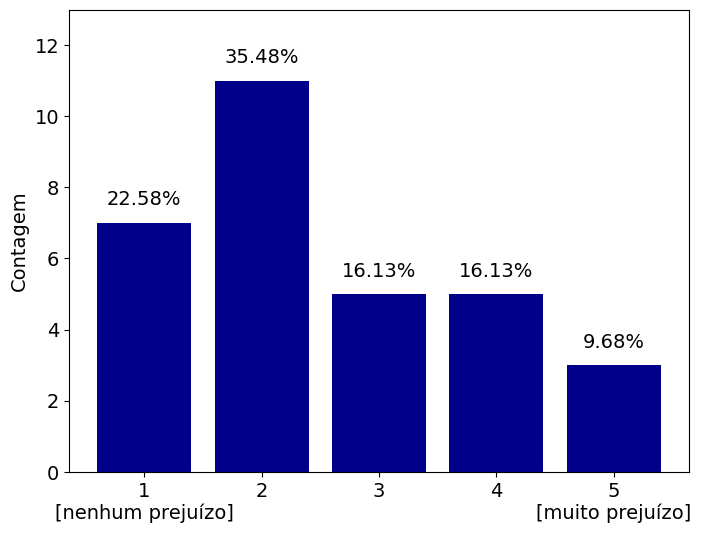

In [514]:
# plotting PS_1 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PS_1_categories = [
    '1\n[nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[muito prejuízo]',
]

axs.bar(PS_1_categories, PS_1_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PS_1_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PS_1_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 13)
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('health_imgs/PS_1_general')
    
# showing the figure
plt.show()

In [515]:
PS_1_damaged_count = PS_1[PS_1 >= 2].size
PS_1_monday_damaged_count = PS_1_monday[PS_1_monday >= 2].size
PS_1_wednesday_damaged_count = PS_1_wednesday[PS_1_wednesday >= 2].size

PS_1_damaged_count, PS_1_monday_damaged_count, PS_1_wednesday_damaged_count

(24, 7, 17)

In [516]:
PS_1_damaged_proportion = PS_1_damaged_count/PS_1.size
PS_1_monday_damaged_proportion = PS_1_monday_damaged_count/PS_1_monday.size
PS_1_wednesday_damaged_proportion = PS_1_wednesday_damaged_count/PS_1_wednesday.size

PS_1_damaged_proportion, PS_1_monday_damaged_proportion, PS_1_wednesday_damaged_proportion

(0.7741935483870968, 0.6363636363636364, 0.85)

In [517]:
# confidence intervals
PS_1_ci_low, PS_1_ci_high = sm.stats.proportion_confint(
    PS_1_damaged_count,
    PS_1.size,
    alpha=0.05,
    method='normal'
    )

PS_1_monday_ci_low, PS_1_monday_ci_high = sm.stats.proportion_confint(
    PS_1_monday_damaged_count,
    PS_1_monday.size,
    alpha=0.05,
    method='normal'
    )

PS_1_wednesday_ci_low, PS_1_wednesday_ci_high = sm.stats.proportion_confint(
    PS_1_wednesday_damaged_count,
    PS_1_wednesday.size,
    alpha=0.05,
    method='wilson'
    )

print(f'PS_1 confidence intervals (soft)')
print(f'general (soft):     ({PS_1_ci_low}, {PS_1_ci_high})')
print(f'monday (soft):      ({PS_1_monday_ci_low}, {PS_1_monday_ci_high})')
print(f'wednesday (soft):   ({PS_1_wednesday_ci_low}, {PS_1_wednesday_ci_high})\n')

PS_1 confidence intervals (soft)
general (soft):     (0.6270096874670537, 0.9213774093071398)
monday (soft):      (0.35208902206760095, 0.9206382506596718)
wednesday (soft):   (0.639581135259243, 0.9476312541037833)



In [701]:
PS_1_mental_health_damage = [
    {
        'counting': PS_1_damaged_count,
        'proportion': get_percentage_str(PS_1_damaged_proportion),
        'low_ci': get_percentage_str(PS_1_ci_low),
        'high_ci': get_percentage_str(PS_1_ci_high)
    },
    {
        'counting': PS_1_monday_damaged_count,
        'proportion': get_percentage_str(PS_1_monday_damaged_proportion),
        'low_ci': get_percentage_str(PS_1_monday_ci_low),
        'high_ci': get_percentage_str(PS_1_monday_ci_high)
    },
    {
        'counting': PS_1_wednesday_damaged_count,
        'proportion': get_percentage_str(PS_1_wednesday_damaged_proportion),
        'low_ci': get_percentage_str(PS_1_wednesday_ci_low),
        'high_ci': get_percentage_str(PS_1_wednesday_ci_high)
    }
]
PS_1_mental_health_damage_indexes = ['general', 'segunda', 'quarta']
PS_1_mental_health_damage_table = pd.DataFrame(PS_1_mental_health_damage, index=PS_1_mental_health_damage_indexes)

PS_1_mental_health_damage_table

,counting,proportion,low_ci,high_ci
general,24,77.42%,62.70%,92.14%
segunda,7,63.64%,35.21%,92.06%
quarta,17,85.00%,63.96%,94.76%


### PS_2
Você sentiu algum prejuízo em termos de saúde física?
- (a) 1 [Não, estou bem]
- (b) 2
- (c) 3
- (d) 4
- (e) 5 [Sim, e muito]

In [519]:
PS_2 = df['PS_2'].dropna()
PS_2_monday = monday_df['PS_2'].dropna()
PS_2_wednesday = wednesday_df['PS_2'].dropna()

PS_2.shape, PS_2_monday.shape, PS_2_wednesday.shape

((31,), (11,), (20,))

In [520]:
PS_2_counting = count_linkert(PS_2)
PS_2_monday_counting = count_linkert(PS_2_monday)
PS_2_wednesday_counting = count_linkert(PS_2_wednesday)

pd.DataFrame([PS_2_counting, PS_2_monday_counting, PS_2_wednesday_counting])

,0,1,2,3,4
0,10.0,6.0,7.0,7.0,1.0
1,5.0,1.0,1.0,4.0,0.0
2,5.0,5.0,6.0,3.0,1.0


In [521]:
PS_2_frequency = PS_2_counting/sum(PS_2_counting)
PS_2_monday_frequency = PS_2_monday_counting/sum(PS_2_monday_counting)
PS_2_wednesday_frequency = PS_2_wednesday_counting/sum(PS_2_wednesday_counting)

pd.DataFrame([PS_2_frequency, PS_2_monday_frequency, PS_2_wednesday_frequency])

,0,1,2,3,4
0,0.322581,0.193548,0.225806,0.225806,0.032258
1,0.454545,0.090909,0.090909,0.363636,0.000000
2,0.250000,0.250000,0.300000,0.150000,0.050000


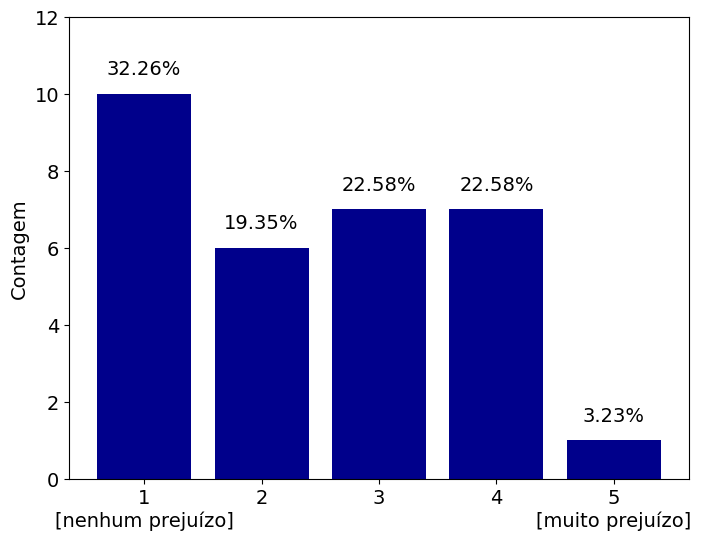

In [522]:
# plotting PS_2 (general)
fig, axs = plt.subplots(figsize=fig_default_size)

PS_2_categories = [
    '1\n[nenhum prejuízo]',
    '2',
    '3',
    '4',
    '5\n[muito prejuízo]',
]

axs.bar(PS_2_categories, PS_2_counting, color=fig_default_color)

# text in the top of the bars
for i in range(5):
    x = i
    y = PS_2_counting[i] + top_bar_text_offset
    percentage_str = get_percentage_str(fraction=PS_2_frequency[i])
    
    fig.text(x, y, percentage_str, ha='center', transform=plt.gca().transData)

# axs setting
axs.yaxis.set_major_locator(MaxNLocator(integer=True)) # restricts the y axis in to integer values
axs.set_ylim(0, 12)
axs.set_ylabel('Contagem')


# save the figure in png format
if save_all_figures:
    plt.savefig('health_imgs/PS_2_general')
    
# showing the figure
plt.show()

In [523]:
PS_2_damaged_count = PS_2[PS_2 >= 2].size
PS_2_monday_damaged_count = PS_2_monday[PS_2_monday >= 2].size
PS_2_wednesday_damaged_count = PS_2_wednesday[PS_2_wednesday >= 2].size

PS_2_damaged_count, PS_2_monday_damaged_count, PS_2_wednesday_damaged_count

(21, 6, 15)

In [524]:
PS_2_damaged_proportion = PS_2_damaged_count/PS_2.size
PS_2_monday_damaged_proportion = PS_2_monday_damaged_count/PS_2_monday.size
PS_2_wednesday_damaged_proportion = PS_2_wednesday_damaged_count/PS_2_wednesday.size

PS_2_damaged_proportion, PS_2_monday_damaged_proportion, PS_2_wednesday_damaged_proportion

(0.6774193548387096, 0.5454545454545454, 0.75)

In [525]:
# confidence intervals
PS_2_ci_low, PS_2_ci_high = sm.stats.proportion_confint(
    PS_2_damaged_count,
    PS_2.size,
    alpha=0.05,
    method='normal'
    )

PS_2_monday_ci_low, PS_2_monday_ci_high = sm.stats.proportion_confint(
    PS_2_monday_damaged_count,
    PS_2_monday.size,
    alpha=0.05,
    method='normal'
    )

PS_2_wednesday_ci_low, PS_2_wednesday_ci_high = sm.stats.proportion_confint(
    PS_2_wednesday_damaged_count,
    PS_2_wednesday.size,
    alpha=0.05,
    method='wilson'
    )

print(f'PS_1 confidence intervals (soft)')
print(f'general (soft):     ({PS_2_ci_low}, {PS_2_ci_high})')
print(f'monday (soft):      ({PS_2_monday_ci_low}, {PS_2_monday_ci_high})')
print(f'wednesday (soft):   ({PS_2_wednesday_ci_low}, {PS_2_wednesday_ci_high})\n')

PS_1 confidence intervals (soft)
general (soft):     (0.5128627957346641, 0.8419759139427552)
monday (soft):      (0.2512023643730069, 0.8397067265360839)
wednesday (soft):   (0.5312991223812559, 0.8881382985923344)



In [700]:
PS_2_physical_health_damage = [
    {
        'counting': PS_2_damaged_count,
        'proportion': get_percentage_str(PS_2_damaged_proportion),
        'low_ci': get_percentage_str(PS_2_ci_low),
        'high_ci': get_percentage_str(PS_2_ci_high)
    },
    {
        'counting': PS_2_monday_damaged_count,
        'proportion': get_percentage_str(PS_1_monday_damaged_proportion),
        'low_ci': get_percentage_str(PS_1_monday_ci_low),
        'high_ci': get_percentage_str(PS_1_monday_ci_high)
    },
    {
        'counting': PS_2_wednesday_damaged_count,
        'proportion': get_percentage_str(PS_1_wednesday_damaged_proportion),
        'low_ci': get_percentage_str(PS_1_wednesday_ci_low),
        'high_ci': get_percentage_str(PS_1_wednesday_ci_high)
    }
]
PS_2_physical_health_damage_indexes = ['general', 'segunda', 'quarta']
PS_2_physical_health_damage_table = pd.DataFrame(PS_2_physical_health_damage, index=PS_2_physical_health_damage_indexes)

PS_2_physical_health_damage_table

,counting,proportion,low_ci,high_ci
general,21,67.74%,51.29%,84.20%
segunda,6,63.64%,35.21%,92.06%
quarta,15,85.00%,63.96%,94.76%


### PS_3
Quais dos sintomas abaixo você apresentou e com que intensidade? [Respostas possíveis são: nenhuma manifestação, apresentei um pouco, moderado e apresentei muito]
- **[PS_3_1]** Cansaço	
- **[PS_3_2]** Estresse	
- **[PS_3_3]** Ansiedade	
- **[PS_3_4]** Irritação	
- **[PS_3_5]** Depressão	

In [527]:
PS_3_aspects = ['PS_3_1', 'PS_3_2', 'PS_3_3', 'PS_3_4', 'PS_3_5']

PS_3 = df[PS_3_aspects].dropna()
PS_3_monday = monday_df[PS_3_aspects].dropna()
PS_4_wednesday = wednesday_df[PS_3_aspects].dropna()

PS_3.shape, PS_3_monday.shape, PS_4_wednesday.shape, 

((29, 5), (10, 5), (19, 5))

In [529]:
PS_3_aspects_count = [count_linkert(PS_3[label] + 1)[:-1] for label in PS_3_aspects]

PS_3_aspects_count

[array([ 2.,  5., 10., 12.]),
 array([ 2.,  5., 13.,  9.]),
 array([ 7., 12.,  5.,  5.]),
 array([8., 9., 7., 5.]),
 array([23.,  4.,  1.,  1.])]

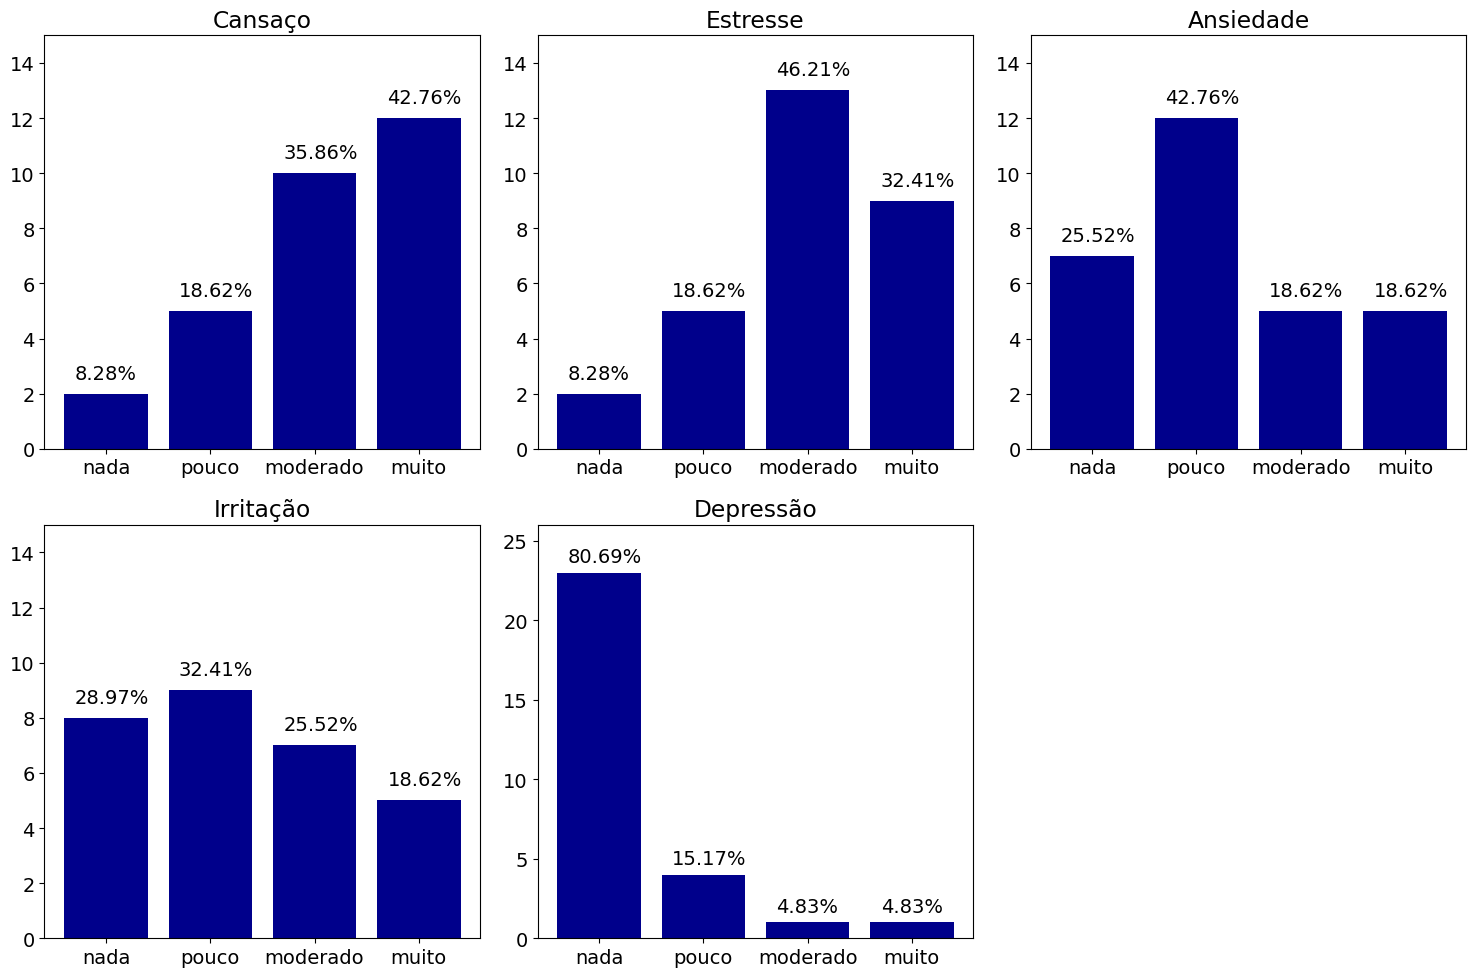

In [604]:
# Dados de contagem para os 5 conjuntos
data = PS_3_aspects_count

PS_3_aspects = [
    'Cansaço',
    'Estresse',
    'Ansiedade',
    'Irritação',
    'Depressão'
    ]

PS_3_labels = ['nada', 'pouco', 'moderado', 'muito']
PS_3_y_tops = [15, 15, 15, 15, 26]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=False)

# Achatar a matriz de subplots para iteração fácil
axs = axs.flatten()

for i, ax in enumerate(axs):
    if i < len(data):
        counts = data[i]
        
        # bar plot
        bars = ax.bar(PS_3_labels, counts, color=fig_default_color)
        
        ax.set_ylim(0, PS_3_y_tops[i])
        # ax.set_ylabel('Contagem')
        
        # var top text
        for j, bar in enumerate(bars):
            x = j - 0.30
            y = bar.get_height() + 0.40
            percentage_str = get_percentage_str(y/PS_3['PS_3_1'].size)
            ax.text(x, y, percentage_str, va='bottom')
        
        ax.set_title(f'{PS_3_aspects[i]}')
    else:
        # removing the empty plot space
        ax.axis('off')

plt.tight_layout()

# save the figure in png format
if save_all_figures:
    plt.savefig('health_imgs/PS_3_general')
    
# showing the figure
plt.show()


In [686]:
PS_3_quality_vector = np.array([0, 1, 2, 3])
PS_3_quality = [(10/3)*np.dot(aspect_count, PS_3_quality_vector)/sum(aspect_count) for aspect_count in PS_3_aspects_count]

PS_3_risk_df = pd.DataFrame(PS_3_quality, index=PS_3_aspects)
PS_3_risk_df.columns = ['risk']
PS_3_risk_df

,risk
Cansaço,7.011494
Estresse,6.666667
Ansiedade,4.252874
Irritação,4.367816
Depressão,1.034483


In [694]:
PS_3_symptoms_presence = [sum(aspect_count[1:]) for aspect_count in PS_3_aspects_count]
PS_3_symptoms_frequency = [symptom_count/sum(PS_3_aspects_count[i]) for i, symptom_count in enumerate(PS_3_symptoms_presence)]

PS_3_risk_df['counting'] = PS_3_symptoms_presence
PS_3_risk_df['frequency'] = PS_3_symptoms_frequency
PS_3_risk_df

,risk,counting,frequency
Cansaço,7.011494,27.0,0.931034
Estresse,6.666667,27.0,0.931034
Ansiedade,4.252874,22.0,0.758621
Irritação,4.367816,21.0,0.724138
Depressão,1.034483,6.0,0.206897


In [698]:
def get_health_label(frequency: float) -> str:
    if frequency == 0:
        return 'non observed'
    elif frequency <= 0.05:
        return 'very rare'
    elif frequency <= 0.20:
        return 'few cases'
    elif frequency <= 0.40:
        return 'moderated cases'
    elif frequency <= 0.60:
        return 'a lot of cases'
    elif frequency <= 0.80:
        return 'prevalent'
    else:
        return 'very prevalent'

In [699]:
PS_3_risk_df['classification'] = PS_3_risk_df['frequency'].apply(get_health_label)
PS_3_risk_df

,risk,counting,frequency,classification
Cansaço,7.011494,27.0,0.931034,very prevalent
Estresse,6.666667,27.0,0.931034,very prevalent
Ansiedade,4.252874,22.0,0.758621,prevalent
Irritação,4.367816,21.0,0.724138,prevalent
Depressão,1.034483,6.0,0.206897,moderated cases


### PS_4
Durante as semanas de projeto, como você avalia, a qualidade dos seguintes aspectos? [Respostas possíveis são: péssimo, ruim, neutro, bom e excelente]
- **[PS_4_1]** sono	
- **[PS_4_2]** alimentação	
- **[PS_4_3]** concentração	
- **[PS_4_4]** humor	
- **[PS_4_5]** bem-estar geral	

In [609]:
PS_4_aspects = ['PS_4_1', 'PS_4_2', 'PS_4_3', 'PS_4_4', 'PS_4_5']

PS_4 = df[PS_4_aspects].dropna()
PS_4_monday = monday_df[PS_4_aspects].dropna()
PS_4_wednesday = wednesday_df[PS_4_aspects].dropna()

PS_4.shape, PS_4_monday.shape, PS_4_wednesday.shape

((30, 5), (10, 5), (20, 5))

In [619]:
PS_4_aspects_count = [count_linkert(PS_4[label]) for label in PS_4_aspects]

PS_4_aspects_count

[array([ 6., 15.,  5.,  2.,  2.]),
 array([ 3., 11.,  9.,  4.,  3.]),
 array([ 3.,  9., 11.,  4.,  3.]),
 array([4., 7., 9., 8., 2.]),
 array([ 4.,  6., 14.,  4.,  2.])]

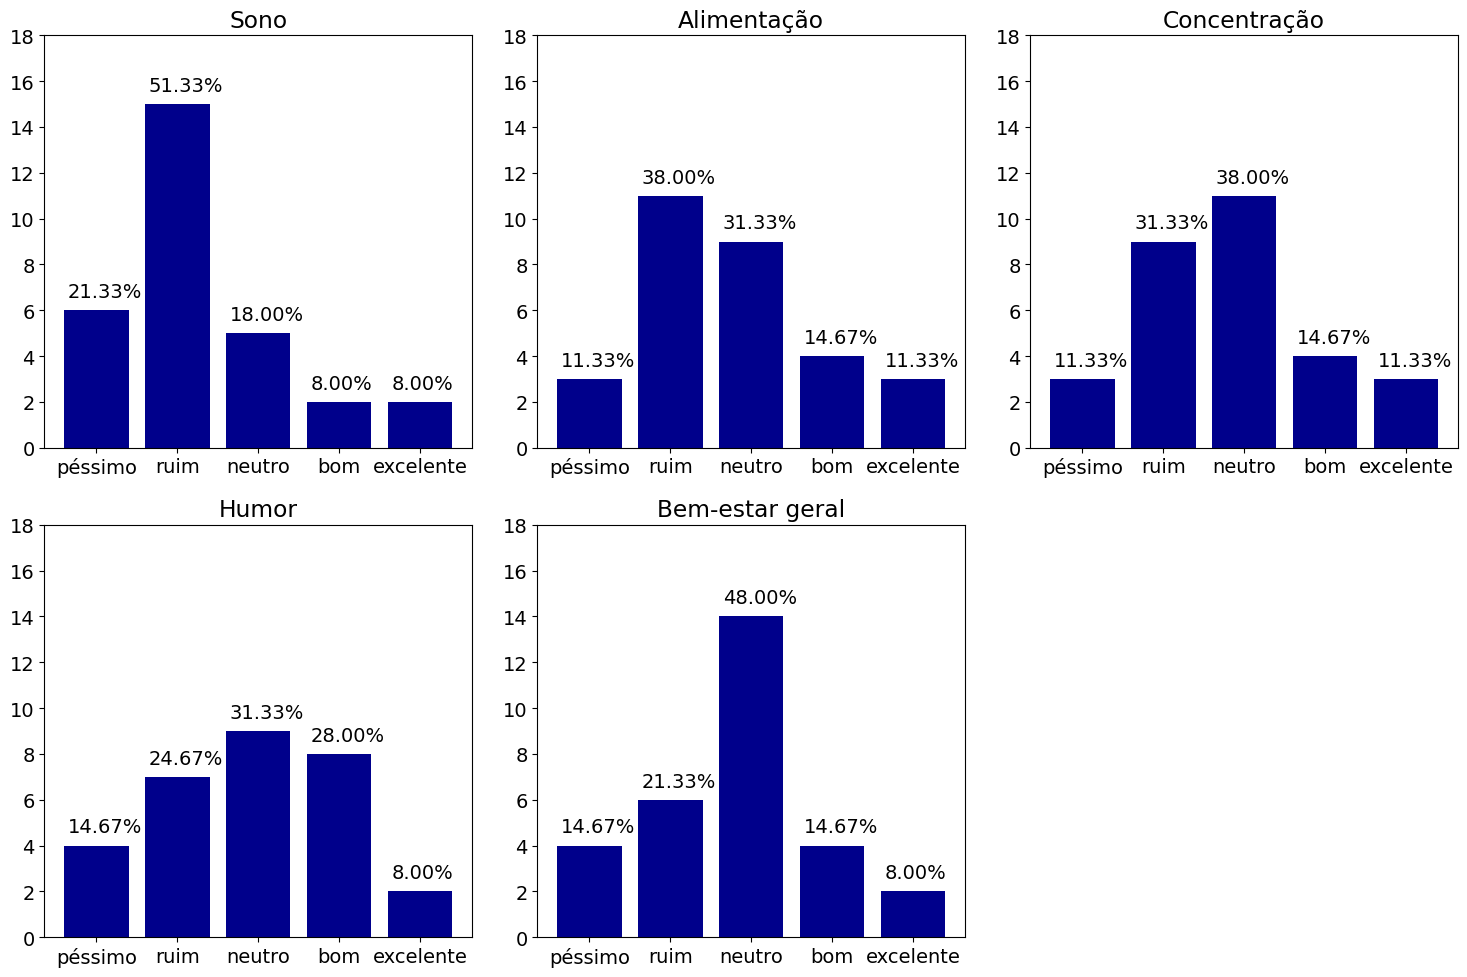

In [622]:
# Dados de contagem para os 5 conjuntos
data = PS_4_aspects_count

PS_4_aspects = [
    'Sono',
    'Alimentação',
    'Concentração',
    'Humor',
    'Bem-estar geral'
    ]

PS_4_labels = ['péssimo', 'ruim', 'neutro', 'bom', 'excelente']
PS_4_y_tops = [18, 18, 18, 18, 18]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=False)

# Achatar a matriz de subplots para iteração fácil
axs = axs.flatten()

for i, ax in enumerate(axs):
    if i < len(data):
        counts = data[i]
        
        # bar plot
        bars = ax.bar(PS_4_labels, counts, color=fig_default_color)
        
        ax.set_ylim(0, PS_4_y_tops[i])
        # ax.set_ylabel('Contagem')
        
        # var top text
        for j, bar in enumerate(bars):
            x = j - 0.35
            y = bar.get_height() + 0.40
            percentage_str = get_percentage_str(y/PS_4['PS_4_1'].size)
            ax.text(x, y, percentage_str, va='bottom')
        
        ax.set_title(f'{PS_4_aspects[i]}')
    else:
        # removing the empty plot space
        ax.axis('off')

plt.tight_layout()

# save the figure in png format
if save_all_figures:
    plt.savefig('health_imgs/PS_4_general')
    
# showing the figure
plt.show()


In [681]:
PS_4_quality_vector = np.array([-2, -1, 0, 1, 2])
PS_4_quality = [5 + 2.5*np.dot(aspect_count, PS_4_quality_vector)/sum(aspect_count) for aspect_count in PS_4_aspects_count]

PS_4_risk_df = pd.DataFrame(PS_4_quality, index=PS_4_aspects)
PS_4_risk_df.columns = ['quality']
PS_4_risk_df

,quality
Sono,3.250000
Alimentação,4.416667
Concentração,4.583333
Humor,4.750000
Bem-estar geral,4.500000


### PS_5
Em relação a alimentação, você conseguiu se alimentar adequadamente durante as semanas de projeto?
- (a) Sim, me alimentei de forma saudável
- (b) Sim, me alimentei normalmente
- (c) Não, eu me alimentei mal
- (d) Não, tive prejuízos na minha alimentação

In [533]:
PS_5 = df['PS_5'].dropna()
PS_5_monday = monday_df['PS_5'].dropna()
PS_5_wednesday = wednesday_df['PS_5'].dropna()

PS_5.shape, PS_5_monday.shape, PS_5_wednesday.shape

((29,), (10,), (19,))

In [534]:
PS_5, PS_5_monday, PS_5_wednesday

(0     -5.0
 1      5.0
 2      5.0
 3      5.0
 4     15.0
 5    -15.0
 6     -5.0
 7     -5.0
 8    -15.0
 9    -15.0
 10   -15.0
 11     5.0
 12    -5.0
 13    -5.0
 15    -5.0
 16    15.0
 17     5.0
 18     5.0
 19   -15.0
 20    -5.0
 21     5.0
 22    -5.0
 23    15.0
 24    15.0
 25     5.0
 26     5.0
 27     5.0
 29     5.0
 30   -15.0
 Name: PS_5, dtype: float64,
 0     -5.0
 1      5.0
 4     15.0
 8    -15.0
 11     5.0
 18     5.0
 20    -5.0
 22    -5.0
 24    15.0
 27     5.0
 Name: PS_5, dtype: float64,
 2      5.0
 3      5.0
 5    -15.0
 6     -5.0
 7     -5.0
 9    -15.0
 10   -15.0
 12    -5.0
 13    -5.0
 15    -5.0
 16    15.0
 17     5.0
 19   -15.0
 21     5.0
 23    15.0
 25     5.0
 26     5.0
 29     5.0
 30   -15.0
 Name: PS_5, dtype: float64)

In [535]:
def count_PS_5_categories(PS_5_data: pd.Series) -> dict:
    healthy = PS_5_data[PS_5_data == 15].size
    normal = PS_5_data[PS_5_data == 5].size
    bad = PS_5_data[PS_5_data == -5].size
    horrible = PS_5_data[PS_5_data == -15].size
    
    counting_dict = {
        'counting': {
            'healthy': healthy,
            'normal': normal,
            'bad': bad,
            'horrible': horrible
        },
        'frequencies': {
            'healthy': healthy/PS_5_data.size,
            'normal': normal/PS_5_data.size,
            'bad': bad/PS_5_data.size,
            'horrible': horrible/PS_5_data.size
        }
    }
    
    return counting_dict

In [536]:
count_PS_5_categories(PS_5)

{'counting': {'healthy': 4, 'normal': 11, 'bad': 8, 'horrible': 6},
 'frequencies': {'healthy': 0.13793103448275862,
  'normal': 0.3793103448275862,
  'bad': 0.27586206896551724,
  'horrible': 0.20689655172413793}}

In [537]:
PS_5_counting = [
    count_PS_5_categories(PS_5)['counting'],
    count_PS_5_categories(PS_5_monday)['counting'],
    count_PS_5_categories(PS_5_wednesday)['counting']
]

PS_5_counting_df = pd.DataFrame(PS_5_counting, index=['general', 'monday', 'wednesday'])
PS_5_counting_df

,healthy,normal,bad,horrible
general,4,11,8,6
monday,2,4,3,1
wednesday,2,7,5,5


In [538]:
PS_5_frequencies = [
    count_PS_5_categories(PS_5)['frequencies'],
    count_PS_5_categories(PS_5_monday)['frequencies'],
    count_PS_5_categories(PS_5_wednesday)['frequencies']
]

PS_5_frequencies_df = pd.DataFrame(PS_5_frequencies, index=['general', 'monday', 'wednesday'])

for label in PS_5_frequencies_df.columns:
    PS_5_frequencies_df[label] = PS_5_frequencies_df[label].apply(get_percentage_str)
    
PS_5_frequencies_df

,healthy,normal,bad,horrible
general,13.79%,37.93%,27.59%,20.69%
monday,20.00%,40.00%,30.00%,10.00%
wednesday,10.53%,36.84%,26.32%,26.32%


In [539]:
PS_5.mean(), PS_5_monday.mean(), PS_5_wednesday.mean()

(-0.5172413793103449, 2.0, -1.8421052631578947)

### PS_6
Se você costuma se alimentar nos bandeijões, a frequência com que você os frequentava foi alterada?
- (a) Sim
- (b) Não



In [540]:
PS_6 = df['PS_6']
PS_6_monday = monday_df['PS_6']
PS_6_wednesday = wednesday_df['PS_6']

PS_6 = PS_6.dropna()
PS_6_monday = PS_6_monday.dropna()
PS_6_wednesday = PS_6_wednesday.dropna()

PS_6.shape, PS_6_monday.shape, PS_6_wednesday.shape

((27,), (9,), (18,))

In [541]:
# getting the total number of ocurrencies
PS_6_yes_count = PS_6[PS_6 == 1].size
PS_6_no_count = PS_6.size - PS_6_yes_count

PS_6_monday_yes_count = PS_6_monday[PS_6_monday == 1].size
PS_6_monday_no_count = PS_6_monday.size - PS_6_monday_yes_count

PS_6_wednesday_yes_count = PS_6_wednesday[PS_6_wednesday == 1].size
PS_6_wednesday_no_count = PS_6_wednesday.size - PS_6_wednesday_yes_count

# getting the proportions
PS_6_yes_proportions = PS_6_yes_count/PS_6.size
PS_6_no_proportions = 1 - PS_6_yes_proportions

PS_6_monday_yes_proportions = PS_6_monday_yes_count/PS_6_monday.size
PS_6_monday_no_proportions = 1 - PS_6_monday_yes_proportions

PS_6_wednesday_yes_proportions = PS_6_wednesday_yes_count/PS_6_wednesday.size
PS_6_wednesday_no_proportions = 1 - PS_6_wednesday_yes_proportions

In [542]:
PS_6_resume = [
    {'yes': PS_6_yes_count, 'no': PS_6_no_count, 'yes(%)': PS_6_yes_proportions, 'no(%)': PS_6_no_proportions},
    {'yes': PS_6_monday_yes_count, 'no': PS_6_monday_no_count, 'yes(%)': PS_6_monday_yes_proportions, 'no(%)': PS_6_monday_no_proportions},
    {'yes': PS_6_wednesday_yes_count, 'no': PS_6_wednesday_no_count, 'yes(%)': PS_6_wednesday_yes_proportions, 'no(%)': PS_6_wednesday_no_proportions}
]

PA_6_indexes = ['general', 'monday', 'wednesday']

PS_6_resume_table = pd.DataFrame(PS_6_resume, index=PA_6_indexes)
PS_6_resume_table

,yes,no,yes(%),no(%)
general,17,10,0.629630,0.370370
monday,6,3,0.666667,0.333333
wednesday,11,7,0.611111,0.388889


In [543]:
PS_6_ci_low, PS_6_ci_high = sm.stats.proportion_confint(
    PS_6_yes_count,
    PA_6.size,
    alpha=0.05,
    method='normal'
    )

PS_6_monday_ci_low, PS_6_monday_ci_high = sm.stats.proportion_confint(
    PS_6_monday_yes_count,
    PA_6.size,
    alpha=0.05,
    method='normal'
    )

PS_6_wednesday_ci_low, PS_6_wednesday_ci_high = sm.stats.proportion_confint(
    PS_6_wednesday_yes_count,
    PA_6.size,
    alpha=0.05,
    method='normal'
    )

print('PS_6 confidence intervals')
print(f'general:   {PS_6_ci_low}, {PS_6_ci_high}')
print(f'monday:    {PS_6_monday_ci_low}, {PS_6_monday_ci_high}')
print(f'wednesday: {PS_6_wednesday_ci_low}, {PS_6_wednesday_ci_high}')

PS_6 confidence intervals
general:   0.3732032620080114, 0.7235709315403756
monday:    0.05447271102650553, 0.33262406316704285
wednesday: 0.18640970171722054, 0.5232677176376181


In [544]:
PS_6_resume_table['low_ci'] = [PS_6_ci_low, PS_6_monday_ci_low, PS_6_wednesday_ci_low]
PS_6_resume_table['high_ci'] = [PS_6_ci_high, PS_6_monday_ci_high, PS_6_wednesday_ci_high]

PS_6_resume_table['low_ci'] = PS_6_resume_table['low_ci'].apply(get_percentage_str)
PS_6_resume_table['high_ci'] = PS_6_resume_table['high_ci'].apply(get_percentage_str)

PS_6_resume_table

,yes,no,yes(%),no(%),low_ci,high_ci
general,17,10,0.629630,0.370370,37.32%,72.36%
monday,6,3,0.666667,0.333333,5.45%,33.26%
wednesday,11,7,0.611111,0.388889,18.64%,52.33%


### PS_7
Você pulou refeições nas semanas de projetos? Com que frequência? [Respostas Possíveis são: não pulei, pulei às vezes e pulei frequentemente]
- **[PS_7_1]** café da manhã	
- **[PS_7_2]** almoço	
- **[PS_7_3]** jantar	

In [545]:
PS_7 = df[['PS_7_1', 'PS_7_2', 'PS_7_3']].dropna()
PS_7_monday = monday_df[['PS_7_1', 'PS_7_2', 'PS_7_3']].dropna()
PS_7_wednesday = wednesday_df[['PS_7_1', 'PS_7_2', 'PS_7_3']].dropna()

PS_7, PS_7_monday, PS_7_wednesday

(    PS_7_1  PS_7_2  PS_7_3
 0      2.0     1.0     0.0
 1      0.0     2.0     1.0
 2      0.0     0.0     0.0
 3      0.0     0.0     0.0
 4      0.0     0.0     0.0
 5      0.0     2.0     1.0
 6      2.0     2.0     1.0
 7      0.0     0.0     0.0
 8      2.0     1.0     1.0
 9      2.0     2.0     1.0
 10     2.0     2.0     2.0
 11     0.0     0.0     0.0
 12     1.0     0.0     2.0
 13     1.0     1.0     1.0
 15     0.0     1.0     1.0
 16     1.0     0.0     0.0
 17     1.0     1.0     0.0
 18     0.0     0.0     0.0
 19     2.0     0.0     0.0
 20     0.0     1.0     0.0
 21     0.0     2.0     0.0
 22     0.0     1.0     0.0
 23     0.0     1.0     0.0
 24     0.0     1.0     0.0
 25     0.0     0.0     1.0
 26     0.0     1.0     0.0
 27     0.0     1.0     1.0
 29     0.0     1.0     0.0
 30     0.0     1.0     1.0,
     PS_7_1  PS_7_2  PS_7_3
 0      2.0     1.0     0.0
 1      0.0     2.0     1.0
 4      0.0     0.0     0.0
 8      2.0     1.0     1.0
 11     0.0     0.0

In [546]:
PS_7_size = PS_7['PS_7_1'].size
PS_7_size

29

In [547]:
# breakfast
PS_7_breakfast_never_skipped = PS_7['PS_7_1'][PS_7['PS_7_1'] == 0].size
PS_7_breakfast_skipped_sometimes = PS_7['PS_7_1'][PS_7['PS_7_1'] == 1].size
PS_7_breakfast_skipped_frequently = PS_7['PS_7_1'][PS_7['PS_7_1'] == 2].size

PS_7_breakfast_never_skipped, PS_7_breakfast_skipped_sometimes, PS_7_breakfast_skipped_frequently

(19, 4, 6)

In [548]:
# aomosso
PS_7_aomosso_never_skipped = PS_7['PS_7_2'][PS_7['PS_7_2'] == 0].size
PS_7_aomosso_skipped_sometimes = PS_7['PS_7_2'][PS_7['PS_7_2'] == 1].size
PS_7_aomosso_skipped_frequently = PS_7['PS_7_2'][PS_7['PS_7_2'] == 2].size

PS_7_aomosso_never_skipped, PS_7_aomosso_skipped_sometimes, PS_7_aomosso_skipped_frequently, 

(10, 13, 6)

In [549]:
# dinner
PS_7_dinner_never_skipped = PS_7['PS_7_3'][PS_7['PS_7_3'] == 0].size
PS_7_dinner_skipped_sometimes = PS_7['PS_7_3'][PS_7['PS_7_3'] == 1].size
PS_7_dinner_skipped_frequently = PS_7['PS_7_3'][PS_7['PS_7_3'] == 2].size

PS_7_dinner_never_skipped, PS_7_dinner_skipped_sometimes, PS_7_dinner_skipped_frequently, 

(17, 10, 2)

In [550]:
PS_7_resume = {
    'breakfast': [
        PS_7_breakfast_never_skipped,
        PS_7_breakfast_skipped_sometimes,
        PS_7_breakfast_skipped_frequently
    ],
    'aomosso': [
        PS_7_aomosso_never_skipped,
        PS_7_aomosso_skipped_sometimes,
        PS_7_aomosso_skipped_frequently
    ],
    'dinner': [
        PS_7_dinner_never_skipped,
        PS_7_dinner_skipped_sometimes,
        PS_7_dinner_skipped_frequently
    ],
    'breakfast_proportion': [
        get_percentage_str(PS_7_breakfast_never_skipped/PS_7_size),
        get_percentage_str(PS_7_breakfast_skipped_sometimes/PS_7_size),
        get_percentage_str(PS_7_breakfast_skipped_frequently/PS_7_size)
    ],
    'aomosso_proportion': [
        get_percentage_str(PS_7_aomosso_never_skipped/PS_7_size),
        get_percentage_str(PS_7_aomosso_skipped_sometimes/PS_7_size),
        get_percentage_str(PS_7_aomosso_skipped_frequently/PS_7_size)
    ],
    'dinner_proportion': [
        get_percentage_str(PS_7_dinner_never_skipped/PS_7_size),
        get_percentage_str(PS_7_dinner_skipped_sometimes/PS_7_size),
        get_percentage_str(PS_7_dinner_skipped_frequently/PS_7_size)
    ]
}

PS_7_indexes = [
    'never_skipped',
    'skipped_sometimes',
    'skipped_frequently'
]

pd.DataFrame(PS_7_resume, index=PS_7_indexes)

,breakfast,aomosso,dinner,breakfast_proportion,aomosso_proportion,dinner_proportion
never_skipped,19,10,17,65.52%,34.48%,58.62%
skipped_sometimes,4,13,10,13.79%,44.83%,34.48%
skipped_frequently,6,6,2,20.69%,20.69%,6.90%


In [551]:
def at_least_one_non_null(row: pd.Series) -> pd.Series:
    """
    Verifies if the row has, at least, one non null value.

    Args:
        row (pandas.Series): a pandas dataframe or series

    Returns:
        bool: True if, at least, the row have a non null value, False otherwise.

    Example:
        >>> df = pd.DataFrame({'A': [1, 2, np.nan, 4],
        ...                    'B': [np.nan, 2, 3, 4],
        ...                    'C': [1, np.nan, 3, np.nan]})
        
        >>> df['new_column'] = df.apply(at_least_one_non_null, axis=1)
        >>> print(df)
           A    B    C   new_column
        0  1  NaN  1.0   True
        1  2  2.0  NaN   True
        2  NaN  3.0  3.0   True
        3  4  4.0  NaN   True
    """
    for value in row:
        if value != 0: return True
    
    return False

In [552]:
PS_7['altered'] = PS_7.apply(at_least_one_non_null, axis=1)
PS_7_monday['altered'] = PS_7_monday.apply(at_least_one_non_null, axis=1)
PS_7_wednesday['altered'] = PS_7_wednesday.apply(at_least_one_non_null, axis=1)

PS_7, PS_7_monday, PS_7_wednesday

(    PS_7_1  PS_7_2  PS_7_3  altered
 0      2.0     1.0     0.0     True
 1      0.0     2.0     1.0     True
 2      0.0     0.0     0.0    False
 3      0.0     0.0     0.0    False
 4      0.0     0.0     0.0    False
 5      0.0     2.0     1.0     True
 6      2.0     2.0     1.0     True
 7      0.0     0.0     0.0    False
 8      2.0     1.0     1.0     True
 9      2.0     2.0     1.0     True
 10     2.0     2.0     2.0     True
 11     0.0     0.0     0.0    False
 12     1.0     0.0     2.0     True
 13     1.0     1.0     1.0     True
 15     0.0     1.0     1.0     True
 16     1.0     0.0     0.0     True
 17     1.0     1.0     0.0     True
 18     0.0     0.0     0.0    False
 19     2.0     0.0     0.0     True
 20     0.0     1.0     0.0     True
 21     0.0     2.0     0.0     True
 22     0.0     1.0     0.0     True
 23     0.0     1.0     0.0     True
 24     0.0     1.0     0.0     True
 25     0.0     0.0     1.0     True
 26     0.0     1.0     0.0     True
 

In [553]:
PS_7_altered_frequency_counting = PS_7[PS_7['altered'] == True]['altered'].size
PS_7_altered_frequency_proportion = PS_7_altered_frequency_counting/PS_7['altered'].size

PS_7_monday_altered_frequency_counting = PS_7_monday[PS_7_monday['altered'] == True]['altered'].size
PS_7_monday_altered_frequency_proportion = PS_7_monday_altered_frequency_counting/PS_7_monday['altered'].size

PS_7_wednesday_altered_frequency_counting = PS_7_wednesday[PS_7_wednesday['altered'] == True]['altered'].size
PS_7_wednesday_altered_frequency_proportion = PS_7_wednesday_altered_frequency_counting/PS_7_wednesday['altered'].size

PS_7_resume = [
    {'counting': PS_7_altered_frequency_counting, 'proportion': get_percentage_str(PS_7_altered_frequency_proportion)},
    {'counting': PS_7_monday_altered_frequency_counting, 'proportion': get_percentage_str(PS_7_monday_altered_frequency_proportion)},
    {'counting': PS_7_wednesday_altered_frequency_counting, 'proportion': get_percentage_str(PS_7_wednesday_altered_frequency_proportion)}
]

PS_7_resume_indexes = ['general', 'monday', 'wednesday']

PS_7_resume_df = pd.DataFrame(PS_7_resume, index=PS_7_resume_indexes)
PS_7_resume_df

,counting,proportion
general,23,79.31%
monday,7,70.00%
wednesday,16,84.21%


In [554]:
PS_7_ci_low, PS_7_ci_high = sm.stats.proportion_confint(
    PS_7_altered_frequency_counting,
    PA_7.size,
    alpha=0.05,
    method='normal'
    )

PS_7_monday_ci_low, PS_7_monday_ci_high = sm.stats.proportion_confint(
    PS_7_monday_altered_frequency_counting,
    PA_7.size,
    alpha=0.05,
    method='normal'
    )

PS_7_wednesday_ci_low, PS_7_wednesday_ci_high = sm.stats.proportion_confint(
    PS_7_wednesday_altered_frequency_counting,
    PA_7.size,
    alpha=0.05,
    method='normal'
    )

print('PS_7 confidence intervals')
print(f'general:   {PS_7_ci_low}, {PS_7_ci_high}')
print(f'monday:    {PS_7_monday_ci_low}, {PS_7_monday_ci_high}')
print(f'wednesday: {PS_7_wednesday_ci_low}, {PS_7_wednesday_ci_high}')

PS_7 confidence intervals
general:   0.5879022399247333, 0.8959687278172022
monday:    0.07862259069286018, 0.37299031253294623
wednesday: 0.3402106708541346, 0.6920473936619944


In [555]:
PS_7_resume_df['low_ci'] = [PS_7_ci_low, PS_7_monday_ci_low, PS_7_wednesday_ci_low]
PS_7_resume_df['high_ci'] = [PS_7_ci_high, PS_7_monday_ci_high, PS_7_wednesday_ci_high]

PS_7_resume_df['low_ci'] = PS_7_resume_df['low_ci'].apply(get_percentage_str)
PS_7_resume_df['high_ci'] = PS_7_resume_df['high_ci'].apply(get_percentage_str)

PS_7_resume_df

,counting,proportion,low_ci,high_ci
general,23,79.31%,58.79%,89.60%
monday,7,70.00%,7.86%,37.30%
wednesday,16,84.21%,34.02%,69.20%


### PS_8
Caso você se sinta confortável, use esse espaço para se expressar. Garantimos que a resposta será anônima e não será identificada por ninguém. Você pode contar seu relato com a disciplina e como se sentiu em relação a ela, ou dizer o que quiser, sob qualquer posicionamento. [Texto Livre]


In [556]:
PS_8 = df['PS_8'].dropna()
PS_8_monday = monday_df['PS_8'].dropna()
PS_8_wednesday = wednesday_df['PS_8'].dropna()

PS_8.shape, PS_8_monday.shape, PS_8_wednesday.shape

((11,), (4,), (7,))

In [557]:
for i, x in enumerate(PS_8_monday): print(f'R_{i+1}_monday\n{x}\n\nVeredict:\nConfidence: \n\n\n\n')
for i, x in enumerate(PS_8_wednesday): print(f'R_{i+1}_wednesday\n{x}\n\nVeredict:\nConfidence: \n\n\n\n')

R_1_monday
O fato de LabDig exigir mais tempo que o normal que qualquer outra matéria me fez entrar em uma bola de neve de pouco tempo de sono para estudar e fazer os outros projetos de outras matérias. O problema, nas três últimas semanas de Quadri cheguei a consumir por volta de 20L de energético

Veredict:
Confidence: 




R_2_monday
Tive muito estresse com essa disciplina, que não consigo nem descrever. Eu passei incontáveis horas no openlab, perdi um monte de materias, me atrasei com tudo. O projeto foi mal orientado e todos foram impelidos a fazerem um projeto de complexidade bem pior que o tempo da disciplina permite. Tive muita ansiedade nas semanas de projeto e me alimentei muito mal; comia coxinha da minerva várias vezes, ao invés de bandecar. Dormi muito mal e tive bastante insônia. Odiei a experiência.
O midorikawa só nos cobrou e não foi compreensivo. Na semana 3, ele viu que os projetos não estavam nem perto de serem finalizados, porque faltava a montagem física e todos e

In [558]:
PS_8 = [    
    {'verdict': 'negative', 'confidence': 0.758, 'group': 'monday'},
    {'verdict': 'negative', 'confidence': 0.943, 'group': 'monday'},
    {'verdict': 'negative', 'confidence': 0.753, 'group': 'monday'},
    {'verdict': 'positive', 'confidence': 0.465, 'group': 'monday'},
    {'verdict': 'neutral', 'confidence': 0.454, 'group': 'wednesday'},
    {'verdict': 'neutral', 'confidence': 0.469, 'group': 'wednesday'},
    {'verdict': 'negative', 'confidence': 0.561, 'group': 'wednesday'},
    {'verdict': 'negative', 'confidence': 0.803, 'group': 'wednesday'},
    {'verdict': 'neutral', 'confidence': 0.467, 'group': 'wednesday'},
    {'verdict': 'negative', 'confidence': 0.359, 'group': 'wednesday'},
    {'verdict': 'neutral', 'confidence': 0.427, 'group': 'wednesday'}
]

PS_8_indexes = [
    'R1_m', 'R2_m', 'R3_m', 'R4_m', 'R1_w', 'R2_w', 'R3_w', 'R4_w', 'R5_w', 'R6_w', 'R7_w'
]

PS_8_df = pd.DataFrame(PS_8, index=PS_8_indexes)
PS_8_df

,verdict,confidence,group
R1_m,negative,0.758,monday
R2_m,negative,0.943,monday
R3_m,negative,0.753,monday
R4_m,positive,0.465,monday
R1_w,neutral,0.454,wednesday
R2_w,neutral,0.469,wednesday
R3_w,negative,0.561,wednesday
R4_w,negative,0.803,wednesday
R5_w,neutral,0.467,wednesday
R6_w,negative,0.359,wednesday


In [559]:
PS_8_sentiment_scores = {
    'negative': -1,
    'neutral': 0,
    'positive': 1
}

def sentiment_score(row: pd.Series) -> pd.Series:
    verdict = row['verdict']
    confidence = row['confidence']
    score = PS_8_sentiment_scores[verdict] * confidence
    
    return score

PS_8_df['score'] = PS_8_df.apply(sentiment_score, axis=1)
PS_8_df

,verdict,confidence,group,score
R1_m,negative,0.758,monday,-0.758
R2_m,negative,0.943,monday,-0.943
R3_m,negative,0.753,monday,-0.753
R4_m,positive,0.465,monday,0.465
R1_w,neutral,0.454,wednesday,0.000
R2_w,neutral,0.469,wednesday,0.000
R3_w,negative,0.561,wednesday,-0.561
R4_w,negative,0.803,wednesday,-0.803
R5_w,neutral,0.467,wednesday,0.000
R6_w,negative,0.359,wednesday,-0.359


In [560]:
PS_8_confidence_sum = sum(PS_8_df['confidence'])
PS_8_score_sum = sum(PS_8_df['score'])
PS_8_average_feeling = PS_8_score_sum/PS_8_confidence_sum

PS_8_average_feeling, PS_8_confidence_sum/len(PS_8), PS_8_score_sum

(-0.5747019662486453, 0.5871818181818181, -3.712)

In [561]:
print(f'average feeling: {PS_8_average_feeling} (-1 to 1 scale)')

average feeling: -0.5747019662486453 (-1 to 1 scale)


## Levantamento das Atividades Avaliativas de outras Disciplinas

In [562]:
subjects_df = pd.read_csv('subjects.csv', sep=';')
subjects_df

,code,name,work_credits,class_credits,hours,exams,in_class_activities,homework
0,4323101,Física I,0,3,45,3,0,0
1,MAC2166,Introdução à Computação,0,4,60,3,0,4
2,MAT2453,Cálculo Diferencial e Integral I,0,6,90,3,0,0
3,MAT3457,Álgebra Linear I,0,4,60,3,0,0
4,PCC3100,Representação Gráfica para Projeto,3,1,75,2,9,1
5,PCS3100,Introdução à Engenharia de Computação,0,4,60,0,10,1
6,PMT3100,Fundamentos de Ciência e Engenharia dos Materiais,0,2,30,3,0,0
7,PMT3131,Química dos Materiais Aplicada à Engenharia El...,0,2,30,3,0,0
8,4323102,Física II,0,2,30,3,0,0
9,MAC0122,Princípios de Desenvolvimento de Algoritmos,0,4,60,2,6,0


In [563]:
subjects_df['total_activities_count'] = subjects_df[['exams', 'in_class_activities', 'homework']].apply(sum, axis=1)
subjects_df

,code,name,work_credits,class_credits,hours,exams,in_class_activities,homework,total_activities_count
0,4323101,Física I,0,3,45,3,0,0,3
1,MAC2166,Introdução à Computação,0,4,60,3,0,4,7
2,MAT2453,Cálculo Diferencial e Integral I,0,6,90,3,0,0,3
3,MAT3457,Álgebra Linear I,0,4,60,3,0,0,3
4,PCC3100,Representação Gráfica para Projeto,3,1,75,2,9,1,12
5,PCS3100,Introdução à Engenharia de Computação,0,4,60,0,10,1,11
6,PMT3100,Fundamentos de Ciência e Engenharia dos Materiais,0,2,30,3,0,0,3
7,PMT3131,Química dos Materiais Aplicada à Engenharia El...,0,2,30,3,0,0,3
8,4323102,Física II,0,2,30,3,0,0,3
9,MAC0122,Princípios de Desenvolvimento de Algoritmos,0,4,60,2,6,0,8


In [564]:
subjects_count = np.array(subjects_df['total_activities_count'])
hour_per_subjects = np.array(subjects_df['hours'])

In [566]:
subjects_count

array([  3,   7,   3,   3,  12,  11,   3,   3,   3,   8,   2,   2,   3,
         3, 102,   2,   3,   2,   3,   2,  14,   3,   9,   8,   5,   3,
         3,   8,   3,  12,   9,   3,   8,  10,   8,  47,  12,   8])

In [567]:
hour_per_subjects/15

array([3., 4., 6., 4., 5., 4., 2., 2., 2., 4., 4., 4., 4., 6., 6., 2., 2.,
       4., 8., 4., 4., 2., 2., 4., 2., 4., 4., 4., 4., 6., 4., 2., 4., 6.,
       4., 8., 4., 4.])

In [568]:
subjects_count_per_hour = subjects_count/(hour_per_subjects/15)
subjects_count_per_hour

array([ 1.        ,  1.75      ,  0.5       ,  0.75      ,  2.4       ,
        2.75      ,  1.5       ,  1.5       ,  1.5       ,  2.        ,
        0.5       ,  0.5       ,  0.75      ,  0.5       , 17.        ,
        1.        ,  1.5       ,  0.5       ,  0.375     ,  0.5       ,
        3.5       ,  1.5       ,  4.5       ,  2.        ,  2.5       ,
        0.75      ,  0.75      ,  2.        ,  0.75      ,  2.        ,
        2.25      ,  1.5       ,  2.        ,  1.66666667,  2.        ,
        5.875     ,  3.        ,  2.        ])

In [569]:
subjects_df['subjects_count_per_hour'] = subjects_count_per_hour
subjects_df

,code,name,work_credits,class_credits,hours,exams,in_class_activities,homework,total_activities_count,subjects_count_per_hour
0,4323101,Física I,0,3,45,3,0,0,3,1.000000
1,MAC2166,Introdução à Computação,0,4,60,3,0,4,7,1.750000
2,MAT2453,Cálculo Diferencial e Integral I,0,6,90,3,0,0,3,0.500000
3,MAT3457,Álgebra Linear I,0,4,60,3,0,0,3,0.750000
4,PCC3100,Representação Gráfica para Projeto,3,1,75,2,9,1,12,2.400000
5,PCS3100,Introdução à Engenharia de Computação,0,4,60,0,10,1,11,2.750000
6,PMT3100,Fundamentos de Ciência e Engenharia dos Materiais,0,2,30,3,0,0,3,1.500000
7,PMT3131,Química dos Materiais Aplicada à Engenharia El...,0,2,30,3,0,0,3,1.500000
8,4323102,Física II,0,2,30,3,0,0,3,1.500000
9,MAC0122,Princípios de Desenvolvimento de Algoritmos,0,4,60,2,6,0,8,2.000000


In [570]:
subjects_count_per_hour[subjects_count_per_hour > 4]

array([17.   ,  4.5  ,  5.875])

In [571]:
PCS3635_count_per_hour = subjects_count_per_hour[35]
PCS3635_count_per_hour

5.875

In [813]:
subjects_df.to_csv('subjects_activities')

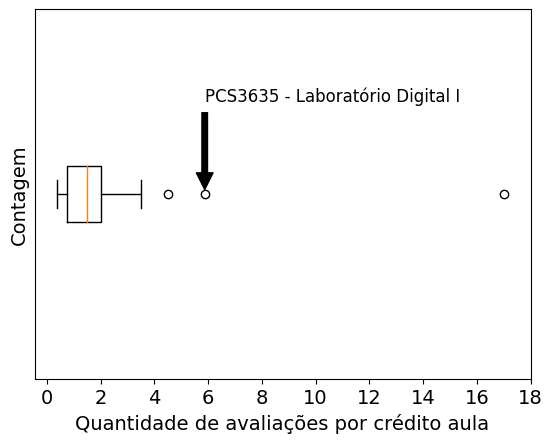

In [809]:
fig, ax = plt.subplots()

boxplot = plt.boxplot(subjects_count_per_hour, vert=False)
plt.xticks(np.arange(0,20,2))
plt.yticks([])
ax.set_xlabel('Quantidade de avaliações por crédito aula')
ax.set_ylabel('Contagem')

for flier in boxplot['fliers']:
    for outlier in flier.get_xdata():
        if outlier == PCS3635_count_per_hour:
            ax.annotate(
                'PCS3635 - Laboratório Digital I',
                xy=(outlier, 1),
                xytext=(outlier, 1.25),
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12,
                color='black'
                )
            
# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_13_boxplot_general')
    
# showing the figure
plt.show()

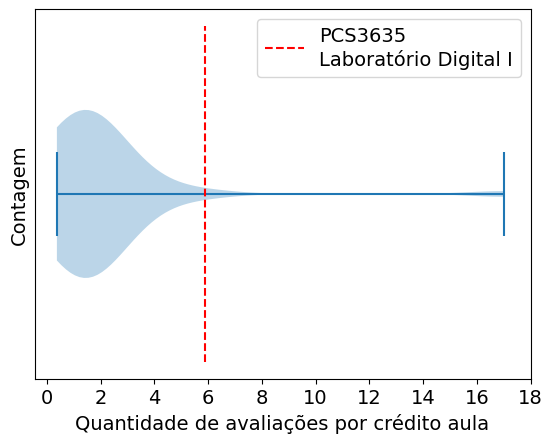

In [810]:
fig, ax = plt.subplots()

violinplot = plt.violinplot(subjects_count_per_hour, vert=False)
ax.vlines(PCS3635_count_per_hour, 1-0.5, 1+0.5, linestyles='dashed', color='red', label='PCS3635\nLaboratório Digital I')
ax.set_xlabel('Quantidade de avaliações por crédito aula')
ax.set_ylabel('Contagem')
plt.xticks(np.arange(0,20,2))
plt.yticks([])
plt.legend()

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_13_violinplot_general')
    
# showing the figure
plt.show()


In [793]:
PA_13_sturges = int(1 + np.log2(subjects_df.shape[0]))
PA_13_sturges

6

In [797]:
PA_13_bins = np.arange(0, 24, 24/PA_13_sturges)
PA_13_bins

array([ 0.,  4.,  8., 12., 16., 20.])

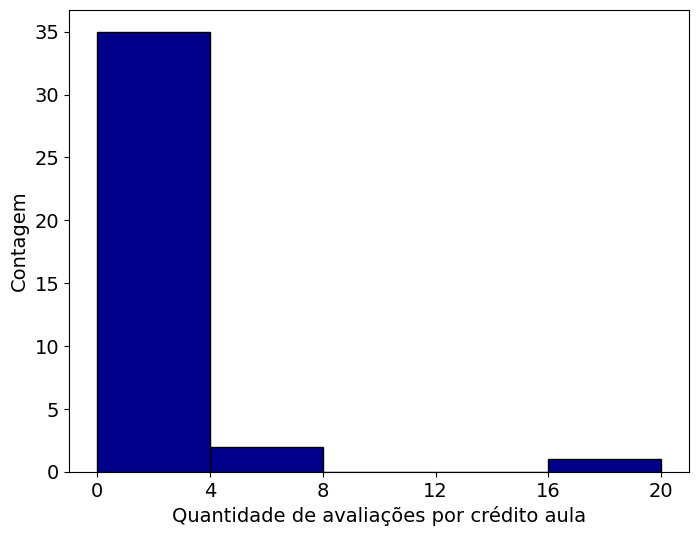

In [811]:
# plotting PA_3 histogram for general counting (monday + wednesday)
fig, axs = plt.subplots(figsize=fig_default_size)

# axs setting
axs.hist(subjects_count_per_hour, bins=PA_13_bins, color=fig_default_color, align='mid', edgecolor='black')
# plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # fix the ticks in to integer values
axs.set_xticks(PA_13_bins)
axs.set_xlabel('Quantidade de avaliações por crédito aula')
axs.set_ylabel('Contagem')

# save the figure in png format
if save_all_figures:
    plt.savefig('academic_imgs/PA_13_histogram')
    
# showing the figure
plt.show()